In [1]:
import scanpy as sc
import scvi

[Executed on 2023-09-11 10:27:54.471414]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/flax/struct.py:132: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future r

In [36]:
scvi_model= scvi.model.SCVI.load('/proj/sensoryaging/model_training_round_2/SCVI_model', accelerator='cpu',device=1,use_gpu=False)

[Executed on 2023-09-11 13:14:07.364405]
INFO     File /proj/sensoryaging/model_training_round_2/SCVI_model/model.pt already downloaded                     


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scvi/model/base/_base_model.py:669: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [37]:
scanvi_model= scvi.model.SCANVI.load('/proj/sensoryaging/model_training_round_2/SCANVI_model', accelerator='cpu',device=1,use_gpu=False)

[Executed on 2023-09-11 13:14:16.579018]
INFO     File /proj/sensoryaging/model_training_round_2/SCANVI_model/model.pt already downloaded                   


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scvi/model/base/_base_model.py:669: UserWarning: `use_gpu` is deprecated in v1.0 and will be removed in v1.1. Please use `accelerator` and `devices` instead.
  _, _, device = parse_device_args(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [38]:
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/willbeusedformodel.h5ad")

[Executed on 2023-09-11 13:14:32.825973]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [39]:
modified.obsm['X_scVI'] = scvi_model.get_latent_representation()
modified.obsm['X_scANVI'] = scanvi_model.get_latent_representation()
modified.obs['scANVI_predict'] = scanvi_model.predict()

[Executed on 2023-09-11 13:14:38.442789]


In [41]:
sc.pp.neighbors(modified, n_neighbors=15, n_pcs=15, use_rep='X_scVI')
sc.tl.umap(modified, min_dist=0.3)
sc.tl.leiden(modified, resolution=0.5,key_added='leiden_scVI')
modified.obsm['X_umap_scVI'] = modified.obsm["X_umap"].copy()

[Executed on 2023-09-11 13:15:06.367522]


[Executed on 2023-09-11 13:15:17.986366]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


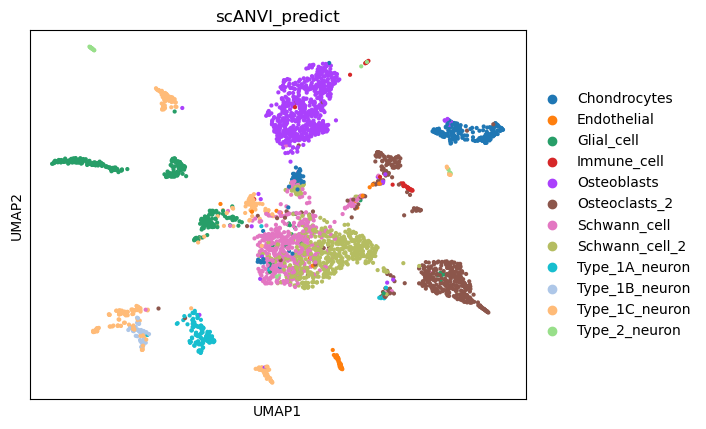

In [42]:
sc.pl.umap(modified,color=['scANVI_predict'],vmax='p95',layer='log1p')

[Executed on 2023-09-11 13:15:19.222750]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


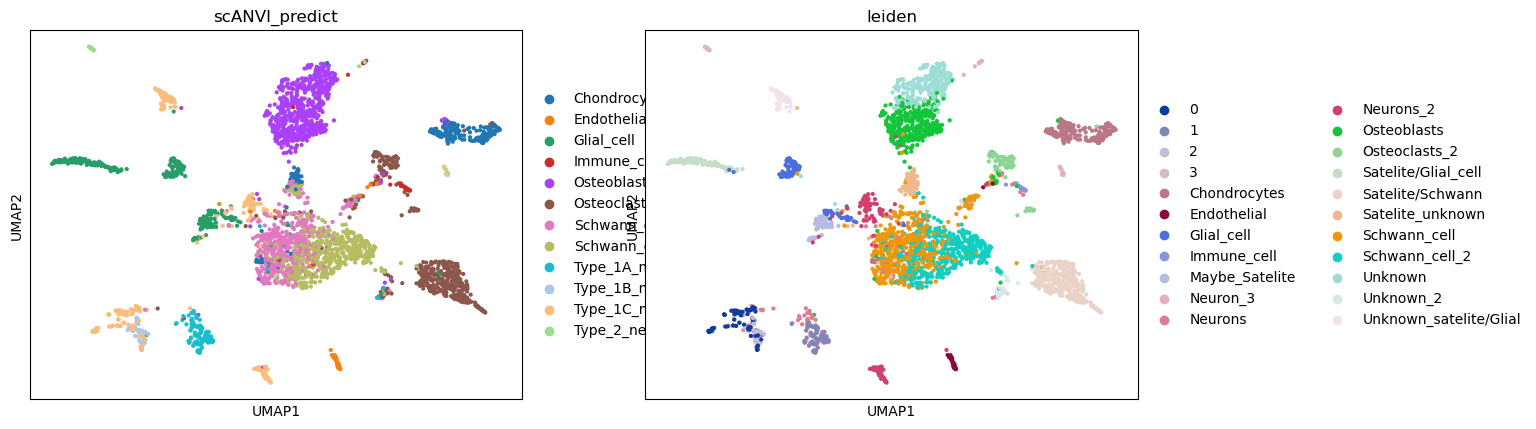

In [43]:
sc.pl.umap(modified,color=['scANVI_predict','leiden'],vmax='p95',layer='log1p')
modified.obsm['X_umap_original'] = modified.obsm['X_umap'].copy()

In [44]:
sc.pp.neighbors(modified, n_neighbors=15, n_pcs=15, use_rep='X_scANVI')
sc.tl.umap(modified, min_dist=0.3)
sc.tl.leiden(modified, resolution=0.5,key_added='leiden_scANVI')
modified.obsm['X_umap_X_scANVI'] = modified.obsm["X_umap"].copy()

[Executed on 2023-09-11 13:15:20.459316]


[Executed on 2023-09-11 13:15:31.043354]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


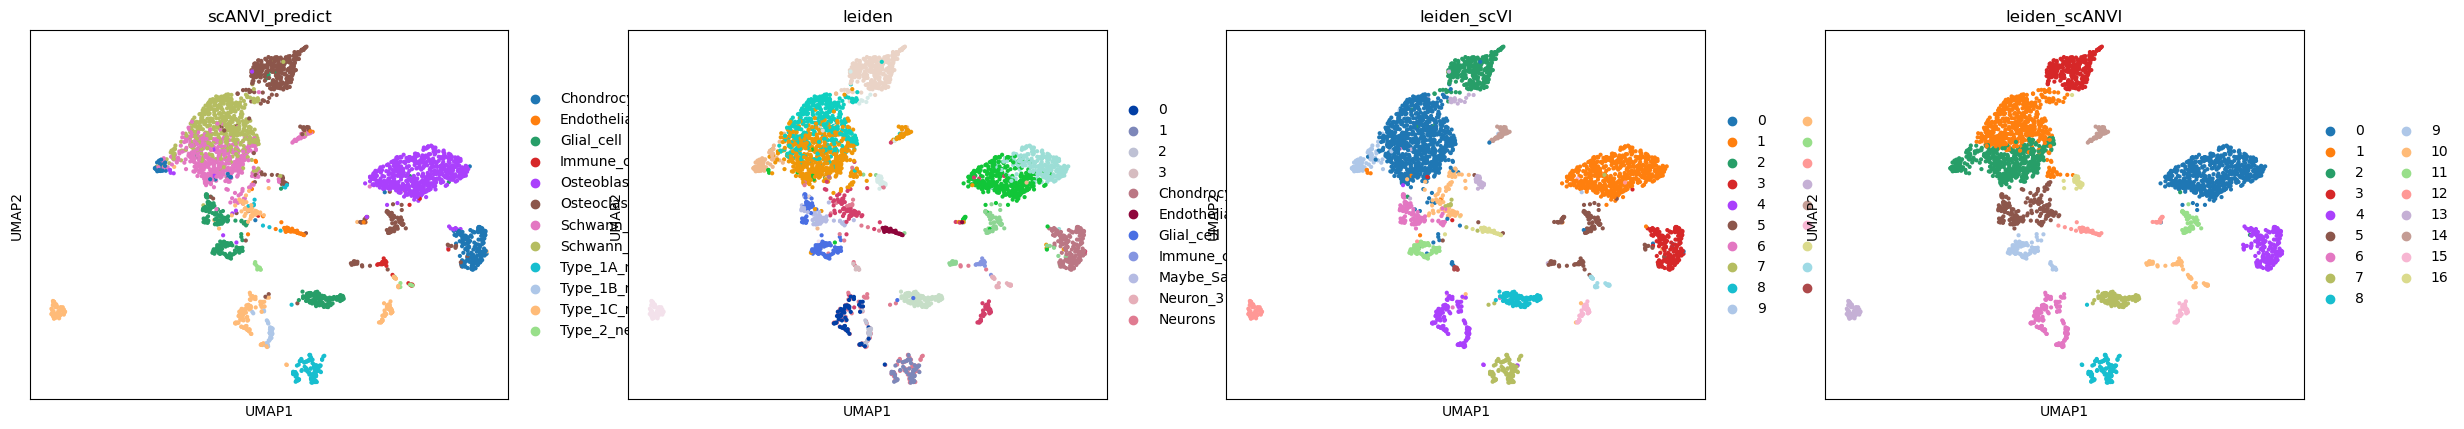

In [45]:
sc.pl.umap(modified,color=['scANVI_predict','leiden',"leiden_scVI",'leiden_scANVI'],vmax='p95',layer='log1p')

[Executed on 2023-09-11 13:16:49.109477]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


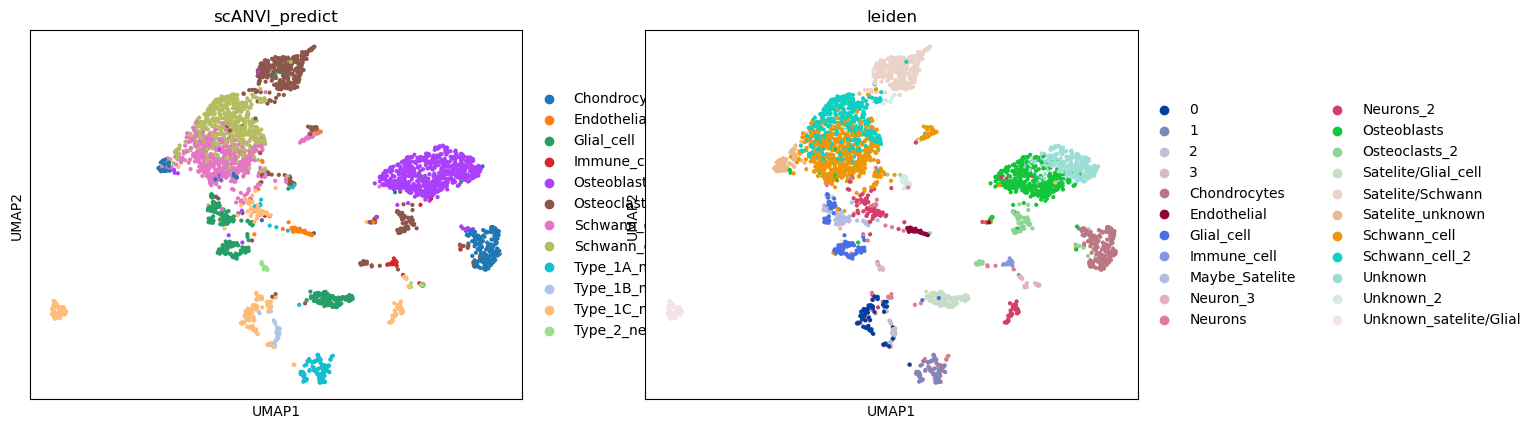

In [52]:
sc.pl.umap(modified,color=['scANVI_predict','leiden'],vmax='p95',layer='log1p')

[Executed on 2023-09-11 13:19:29.233679]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


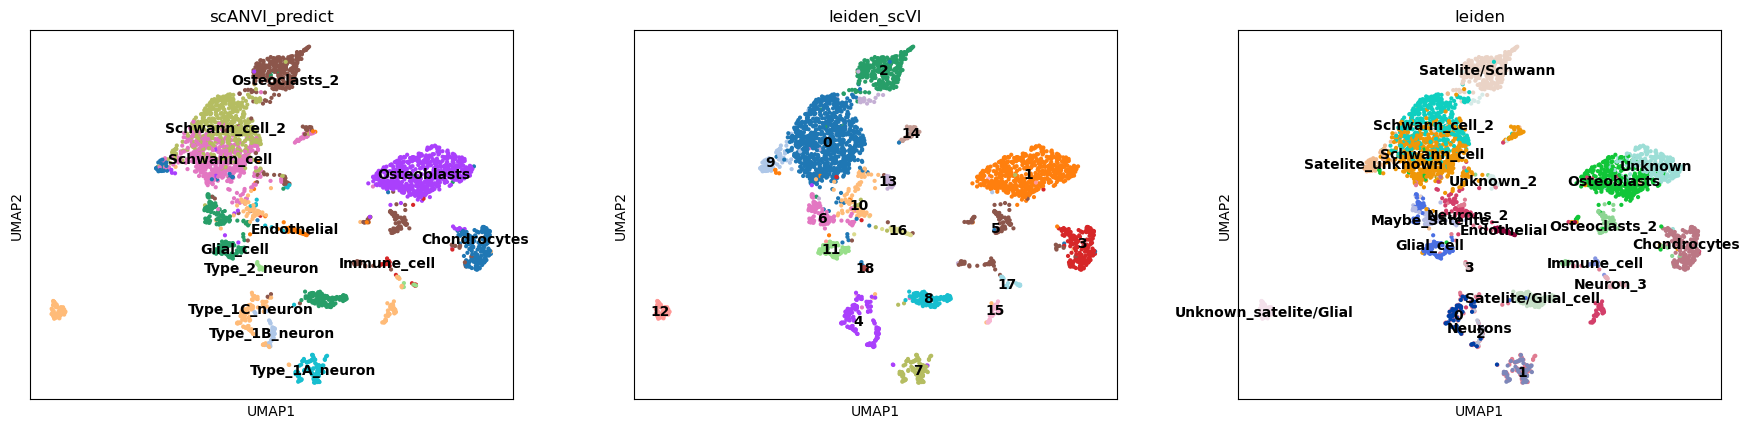

In [54]:
sc.pl.umap(modified,color=['scANVI_predict','leiden_scVI','leiden'],vmax='p95',layer='log1p',legend_loc='on data')

In [ ]:
subset_neuron=modified[modified.obs['']]

In [46]:
scanvi_model.adata

[Executed on 2023-09-11 13:15:35.332669]


AnnData object with n_obs × n_vars = 3298 × 3500
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', '_scvi_batch', '_scvi_labels'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

In [47]:
modified2=modified[:,scanvi_model.adata.var_names].copy()

[Executed on 2023-09-11 13:15:38.055716]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [48]:
modified2.layers['scanNV_norm'] = scanvi_model.get_normalized_expression(library_size=1e4)

[Executed on 2023-09-11 13:15:40.166443]


In [49]:
modified2.layers['scVi_norm'] = scvi_model.get_normalized_expression(library_size=1e4)

[Executed on 2023-09-11 13:15:44.372608]


[Executed on 2023-09-11 13:16:04.050607]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


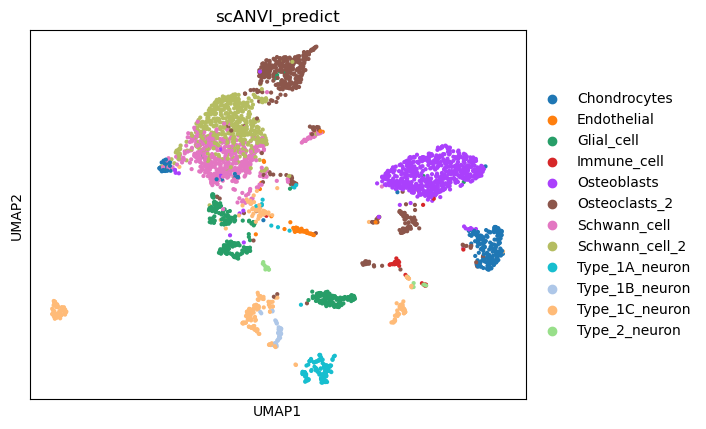

In [51]:
sc.pl.umap(modified2,color='scANVI_predict')

### try again without the three neurons

In [133]:
import scanpy as sc
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")
ad_filtered3=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/filter3butfinal.h5ad")

[Executed on 2023-09-11 14:38:48.483327]


In [134]:
modified

[Executed on 2023-09-11 14:38:53.671015]


AnnData object with n_obs × n_vars = 3158 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-11 14:38:53.728538]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


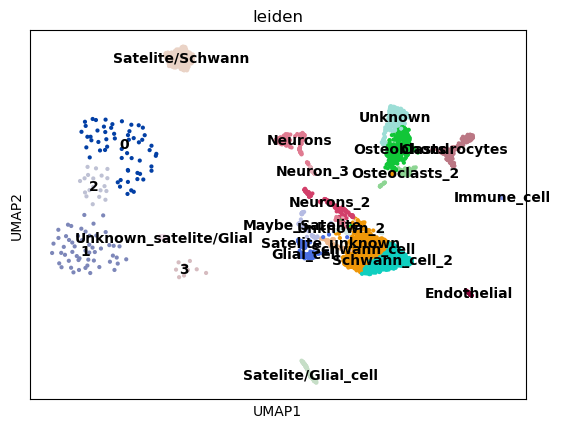

In [135]:
combined = sc.concat([modified, ad_filtered3], join='outer')
combined.obs_names_make_unique()

import scanpy as sc

sc.pl.umap(combined, color='leiden',legend_loc='on data')


In [136]:
combined.obs['leiden_new'] = combined.obs['leiden'].astype(str).copy()
combined.obs['leiden_new'].value_counts()

[Executed on 2023-09-11 14:38:57.901885]


leiden_new
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
0                          58
1                          54
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
2                          19
3                           9
Name: count, dtype: int64

In [ ]:
combined.obs['leiden_new'] = combined.obs['leiden'].astype(str).copy()

combined.obs.leiden_new[combined.obs.leiden_new == 'Satelite/Glial_cell'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Unknown_satelite/Glial'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Satelite_unknown'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Maybe_Satelite'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Unknown_2'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Satelite/Schwann'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == '0'] = 'Type_1C_neuron'
combined.obs.leiden_new[combined.obs.leiden_new == '2'] = 'Type_1B_neuron'
combined.obs.leiden_new[combined.obs.leiden_new == '3'] = 'Type_2_neuron'
combined.obs.leiden_new[combined.obs.leiden_new == '1'] = 'Type_1A_neuron'
combined.obs.leiden_new[combined.obs.leiden_new == 'Neuron_3'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Neurons_2'] = 'Unknown'
combined.obs.leiden_new[combined.obs.leiden_new == 'Neurons'] = 'Unknown'

[Executed on 2023-09-11 10:57:27.415692]


/scratch/41013420/ipykernel_11459/414282650.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.obs.leiden_new[combined.obs.leiden_new == 'Satelite/Glial_cell'] = 'Unknown'
/scratch/41013420/ipykernel_11459/414282650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.obs.leiden_new[combined.obs.leiden_new == 'Unknown_satelite/Glial'] = 'Unknown'
/scratch/41013420/ipykernel_11459/414282650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

[Executed on 2023-09-11 14:39:24.621282]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


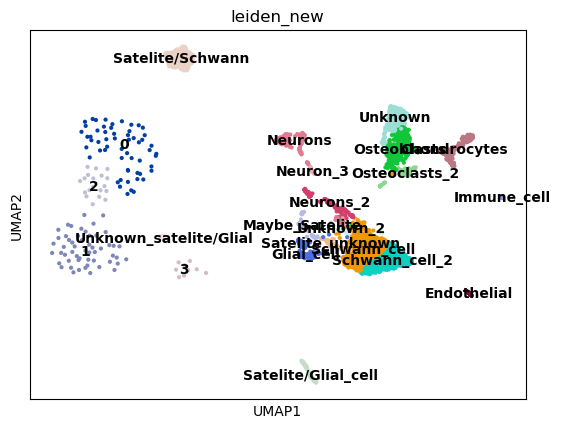

In [137]:
sc.pl.umap(combined, color='leiden_new',legend_loc='on data')

In [138]:
combined.obs['leiden_new'].value_counts()

[Executed on 2023-09-11 14:39:26.804765]


leiden_new
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
0                          58
1                          54
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
2                          19
3                           9
Name: count, dtype: int64

In [4]:
combined.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/willbeusedformodel.h5ad")

[Executed on 2023-09-13 14:58:20.448059]


NameError: name 'combined' is not defined

In [19]:
import scanpy as sc
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")
combined=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/willbeusedformodel.h5ad")

[Executed on 2023-09-13 15:16:09.036099]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [20]:
combined.obs

[Executed on 2023-09-13 15:16:19.469965]


sample_ID_Plate   batch  n_genes  n_genes_by_counts  \
AACCACATCGAGGTGTCGAG        11101383  batch2     2484               2483   
AACCACATCGATCCAAGGAA        11101383  batch2     2067               2066   
AACCACATCGCACGGTGGTT        11101383  batch2     3625               3624   
AACCACATCGCCTACTGAAG        11101383  batch2     4533               4533   
AACCACATCGCCTATCCTTA        11101383  batch2     3699               3698   
...                              ...     ...      ...                ...   
TTCCTTCGAGTTGTCACGTT        11101389  batch1    11240              11206   
TTGAACTGAGGCGTCACCAA        11101389  batch1     9579               9564   
TTGAGACTGTTACGACACTT        11101967  batch1     6233               6227   
TTGGAACCGACCATGTTCGG        11101967  batch1     2116               2116   
TTGGAAGTTGGACGTCCAGA        11101971  batch1     8732               8716   

                      total_counts  total_counts_mt  pct_counts_mt  \
AACCACATCGAGGTGTCGAG        4748.0             16.0       0.336984   
AACCACATCGATCCAAGGAA        3183.0              5.0       0.157085   
AACCACATCGCACGGTGGTT       10178.0              4.0       0.039300   
AACCACATCGCCTACTGAAG       10765.0             13.0       0.120762   
AACCACATCGCCTATCCTTA       12036.0              4.0       0.033234   
...                            ...              ...            ...   
TTCCTTCGAGTTGTCACGTT      141666.0             10.0       0.007059   
TTGAACTGAGGCGTCACCAA      100031.0              2.0       0.001999   
TTGAGACTGTTACGACACTT       32231.0              4.0       0.012410   
TTGGAACCGACCATGTTCGG        5271.0              0.0       0.000000   
TTGGAAGTTGGACGTCCAGA       72833.0              8.0       0.010984   

                                leiden  doublet_scores  predicted_doublets  \
AACCACATCGAGGTGTCGAG      Schwann_cell        0.033843               False   
AACCACATCGATCCAAGGAA           Unknown        0.095284               False   
AACCACATCGCACGGTGGTT           Unknown        0.056225               False   
AACCACATCGCCTACTGAAG  Satelite/Schwann        0.038751               False   
AACCACATCGCCTATCCTTA    Schwann_cell_2        0.022463               False   
...                                ...             ...                 ...   
TTCCTTCGAGTTGTCACGTT                 0        0.048758               False   
TTGAACTGAGGCGTCACCAA                 1        0.032353               False   
TTGAGACTGTTACGACACTT                 0        0.072246               False   
TTGGAACCGACCATGTTCGG                 0        0.131238               False   
TTGGAAGTTGGACGTCCAGA                 0        0.044438               False   

                         sex leiden_sub      leiden_new  
AACCACATCGAGGTGTCGAG  female        NaN    Schwann_cell  
AACCACATCGATCCAAGGAA    male        NaN         Unknown  
AACCACATCGCACGGTGGTT  female        NaN         Unknown  
AACCACATCGCCTACTGAAG    male        NaN         Unknown  
AACCACATCGCCTATCCTTA    male        NaN  Schwann_cell_2  
...                      ...        ...             ...  
TTCCTTCGAGTTGTCACGTT    male          3  Type_1C_neuron  
TTGAACTGAGGCGTCACCAA    male        1,0  Type_1A_neuron  
TTGAGACTGTTACGACACTT    male          2  Type_1C_neuron  
TTGGAACCGACCATGTTCGG    male          2  Type_1C_neuron  
TTGGAAGTTGGACGTCCAGA  female          2  Type_1C_neuron  

[3298 rows x 13 columns]

[Executed on 2023-09-13 15:16:19.648438]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


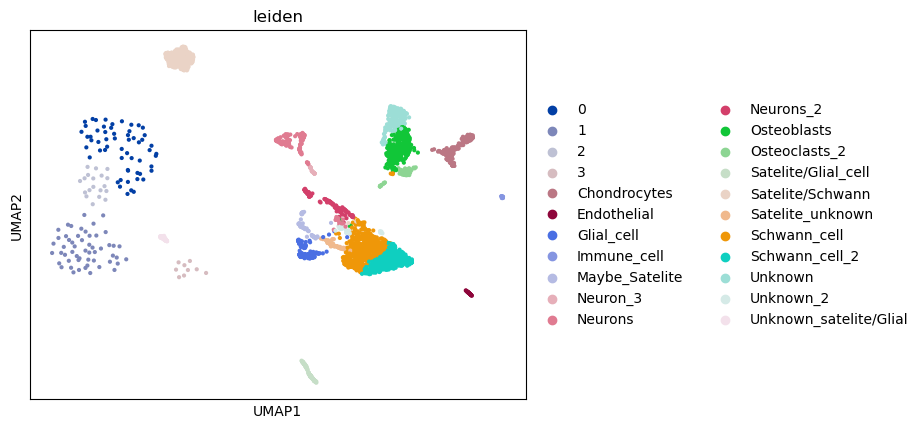

In [21]:
sc.pl.umap(combined,color='leiden')

In [22]:
combined.obs

[Executed on 2023-09-13 15:16:20.390753]


sample_ID_Plate   batch  n_genes  n_genes_by_counts  \
AACCACATCGAGGTGTCGAG        11101383  batch2     2484               2483   
AACCACATCGATCCAAGGAA        11101383  batch2     2067               2066   
AACCACATCGCACGGTGGTT        11101383  batch2     3625               3624   
AACCACATCGCCTACTGAAG        11101383  batch2     4533               4533   
AACCACATCGCCTATCCTTA        11101383  batch2     3699               3698   
...                              ...     ...      ...                ...   
TTCCTTCGAGTTGTCACGTT        11101389  batch1    11240              11206   
TTGAACTGAGGCGTCACCAA        11101389  batch1     9579               9564   
TTGAGACTGTTACGACACTT        11101967  batch1     6233               6227   
TTGGAACCGACCATGTTCGG        11101967  batch1     2116               2116   
TTGGAAGTTGGACGTCCAGA        11101971  batch1     8732               8716   

                      total_counts  total_counts_mt  pct_counts_mt  \
AACCACATCGAGGTGTCGAG        4748.0             16.0       0.336984   
AACCACATCGATCCAAGGAA        3183.0              5.0       0.157085   
AACCACATCGCACGGTGGTT       10178.0              4.0       0.039300   
AACCACATCGCCTACTGAAG       10765.0             13.0       0.120762   
AACCACATCGCCTATCCTTA       12036.0              4.0       0.033234   
...                            ...              ...            ...   
TTCCTTCGAGTTGTCACGTT      141666.0             10.0       0.007059   
TTGAACTGAGGCGTCACCAA      100031.0              2.0       0.001999   
TTGAGACTGTTACGACACTT       32231.0              4.0       0.012410   
TTGGAACCGACCATGTTCGG        5271.0              0.0       0.000000   
TTGGAAGTTGGACGTCCAGA       72833.0              8.0       0.010984   

                                leiden  doublet_scores  predicted_doublets  \
AACCACATCGAGGTGTCGAG      Schwann_cell        0.033843               False   
AACCACATCGATCCAAGGAA           Unknown        0.095284               False   
AACCACATCGCACGGTGGTT           Unknown        0.056225               False   
AACCACATCGCCTACTGAAG  Satelite/Schwann        0.038751               False   
AACCACATCGCCTATCCTTA    Schwann_cell_2        0.022463               False   
...                                ...             ...                 ...   
TTCCTTCGAGTTGTCACGTT                 0        0.048758               False   
TTGAACTGAGGCGTCACCAA                 1        0.032353               False   
TTGAGACTGTTACGACACTT                 0        0.072246               False   
TTGGAACCGACCATGTTCGG                 0        0.131238               False   
TTGGAAGTTGGACGTCCAGA                 0        0.044438               False   

                         sex leiden_sub      leiden_new  
AACCACATCGAGGTGTCGAG  female        NaN    Schwann_cell  
AACCACATCGATCCAAGGAA    male        NaN         Unknown  
AACCACATCGCACGGTGGTT  female        NaN         Unknown  
AACCACATCGCCTACTGAAG    male        NaN         Unknown  
AACCACATCGCCTATCCTTA    male        NaN  Schwann_cell_2  
...                      ...        ...             ...  
TTCCTTCGAGTTGTCACGTT    male          3  Type_1C_neuron  
TTGAACTGAGGCGTCACCAA    male        1,0  Type_1A_neuron  
TTGAGACTGTTACGACACTT    male          2  Type_1C_neuron  
TTGGAACCGACCATGTTCGG    male          2  Type_1C_neuron  
TTGGAAGTTGGACGTCCAGA  female          2  Type_1C_neuron  

[3298 rows x 13 columns]

In [23]:
combined.obs['leiden'].value_counts()

[Executed on 2023-09-13 15:16:20.462830]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
0                          58
1                          54
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
2                          19
3                           9
Name: count, dtype: int64

[Executed on 2023-09-13 15:16:20.589661]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


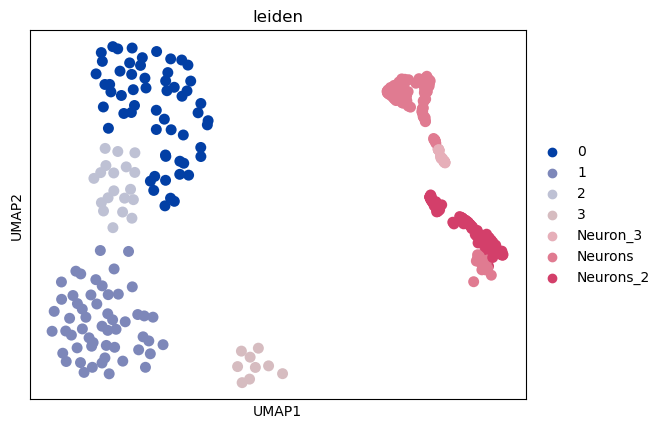

In [24]:
subcluster=combined[combined.obs['leiden'].isin(['0','1','2','3','Neurons','Neurons_2','Neuron_3'])].copy()


subcluster.obs['leiden_old']=subcluster.obs['leiden'].copy()


sc.pl.umap(subcluster,color='leiden')

In [1]:
import scanpy as sc

[Executed on 2023-09-13 14:56:11.014067]


In [12]:
subcluster

[Executed on 2023-09-13 15:00:11.232099]


AnnData object with n_obs × n_vars = 481 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', 'leiden_old'
    uns: 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

In [25]:
del subcluster.layers['log1p']
del subcluster.layers['Scale']

subcluster.X = subcluster.layers['umi'].copy()
sc.pp.normalize_total(subcluster, target_sum=None)
sc.pp.log1p(subcluster)
subcluster.layers['log1p'] = subcluster.X.copy()
sc.pp.scale(subcluster, max_value=10)
subcluster.layers['Scale'] = subcluster.X.copy()

[Executed on 2023-09-13 15:16:26.770218]


[Executed on 2023-09-13 15:16:28.877558]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


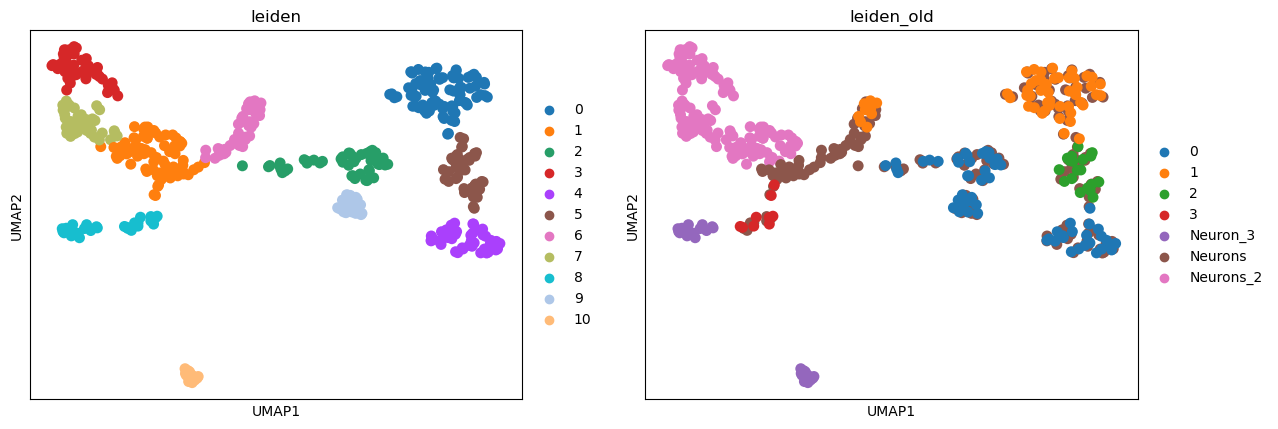

In [26]:
sc.pp.neighbors(subcluster, n_neighbors=15, n_pcs=15)
sc.tl.leiden(subcluster,resolution=0.5)
sc.tl.umap(subcluster,min_dist=0.6)
sc.pl.umap(subcluster,color=['leiden','leiden_old'],vmax='p95',layer='uml')

[Executed on 2023-09-13 15:23:08.716666]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


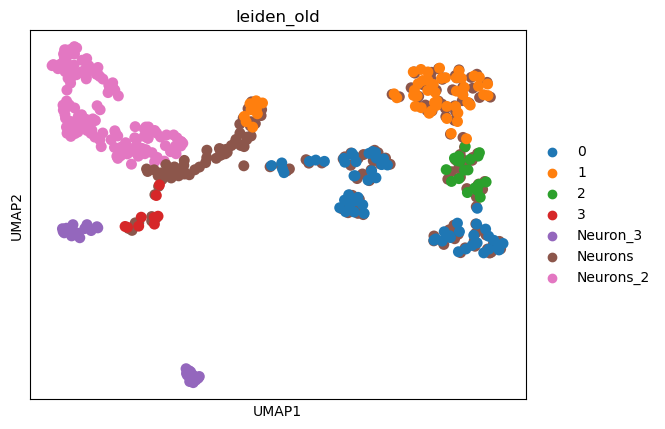

In [31]:
sc.pl.umap(subcluster,color=['leiden_old'],vmax='p95',layer='log1p')

[Executed on 2023-09-13 15:26:40.477013]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


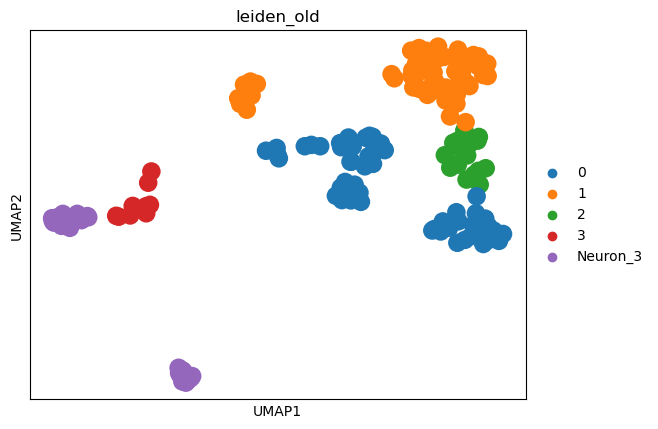

In [37]:
subcluster_remove_brown_pink=subcluster[~subcluster.obs['leiden_old'].isin(['Neurons','Neurons_2'])].copy()

sc.pl.umap(subcluster_remove_brown_pink,color=['leiden_old'],vmax='p95',layer='log1p')

In [53]:
subcluster_remove_brown_pink.obs

[Executed on 2023-09-13 16:08:51.381866]


sample_ID_Plate   batch  n_genes  n_genes_by_counts  \
AACTTAGTGGTTCTGCCTGA        11176495  batch2     2732               2732   
AACTTGGTCTCGAAGCTCTG        11176497  batch2     2581               2578   
ACCTTGTGATATAGTCGAAG        11176498  batch2     3753               3752   
AGCTAAGTTGCCTACTGAAG        11176495  batch2     4132               4130   
AGCTAAGTTGCGTGGCCAAT        11176497  batch2     3266               3265   
...                              ...     ...      ...                ...   
TTCCTTCGAGTTGTCACGTT        11101389  batch1    11240              11206   
TTGAACTGAGGCGTCACCAA        11101389  batch1     9579               9564   
TTGAGACTGTTACGACACTT        11101967  batch1     6233               6227   
TTGGAACCGACCATGTTCGG        11101967  batch1     2116               2116   
TTGGAAGTTGGACGTCCAGA        11101971  batch1     8732               8716   

                      total_counts  total_counts_mt  pct_counts_mt leiden  \
AACTTAGTGGTTCTGCCTGA        6369.0              3.0       0.047103     10   
AACTTGGTCTCGAAGCTCTG        4983.0             15.0       0.301023      8   
ACCTTGTGATATAGTCGAAG        9589.0              4.0       0.041714      8   
AGCTAAGTTGCCTACTGAAG       12210.0             10.0       0.081900      8   
AGCTAAGTTGCGTGGCCAAT        8126.0              4.0       0.049225     10   
...                            ...              ...            ...    ...   
TTCCTTCGAGTTGTCACGTT      141666.0             10.0       0.007059      9   
TTGAACTGAGGCGTCACCAA      100031.0              2.0       0.001999      6   
TTGAGACTGTTACGACACTT       32231.0              4.0       0.012410      2   
TTGGAACCGACCATGTTCGG        5271.0              0.0       0.000000      2   
TTGGAAGTTGGACGTCCAGA       72833.0              8.0       0.010984      9   

                      doublet_scores  predicted_doublets     sex leiden_sub  \
AACTTAGTGGTTCTGCCTGA        0.114681               False    male        NaN   
AACTTGGTCTCGAAGCTCTG        0.140992               False    male        NaN   
ACCTTGTGATATAGTCGAAG        0.095284               False    male        NaN   
AGCTAAGTTGCCTACTGAAG        0.101158               False  female        NaN   
AGCTAAGTTGCGTGGCCAAT        0.122520               False    male        NaN   
...                              ...                 ...     ...        ...   
TTCCTTCGAGTTGTCACGTT        0.048758               False    male          3   
TTGAACTGAGGCGTCACCAA        0.032353               False    male        1,0   
TTGAGACTGTTACGACACTT        0.072246               False    male          2   
TTGGAACCGACCATGTTCGG        0.131238               False    male          2   
TTGGAAGTTGGACGTCCAGA        0.044438               False  female          2   

                          leiden_new leiden_old  leiden_0  
AACTTAGTGGTTCTGCCTGA         Unknown   Neuron_3  Neuron_3  
AACTTGGTCTCGAAGCTCTG         Unknown   Neuron_3  Neuron_3  
ACCTTGTGATATAGTCGAAG         Unknown   Neuron_3  Neuron_3  
AGCTAAGTTGCCTACTGAAG         Unknown   Neuron_3  Neuron_3  
AGCTAAGTTGCGTGGCCAAT         Unknown   Neuron_3  Neuron_3  
...                              ...        ...       ...  
TTCCTTCGAGTTGTCACGTT  Type_1C_neuron          0         0  
TTGAACTGAGGCGTCACCAA  Type_1A_neuron          1         1  
TTGAGACTGTTACGACACTT  Type_1C_neuron          0         0  
TTGGAACCGACCATGTTCGG  Type_1C_neuron          0         0  
TTGGAAGTTGGACGTCCAGA  Type_1C_neuron          0         0  

[168 rows x 15 columns]

In [54]:
subcluster_remove_brown_pink.obs_names.duplicated().sum()

[Executed on 2023-09-13 16:09:05.751589]


0

In [36]:
subcluster_remove_brown_pink.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/removetwoneurons.h5ad")

[Executed on 2023-09-13 15:25:38.180903]


[Executed on 2023-09-13 15:27:44.703297]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2

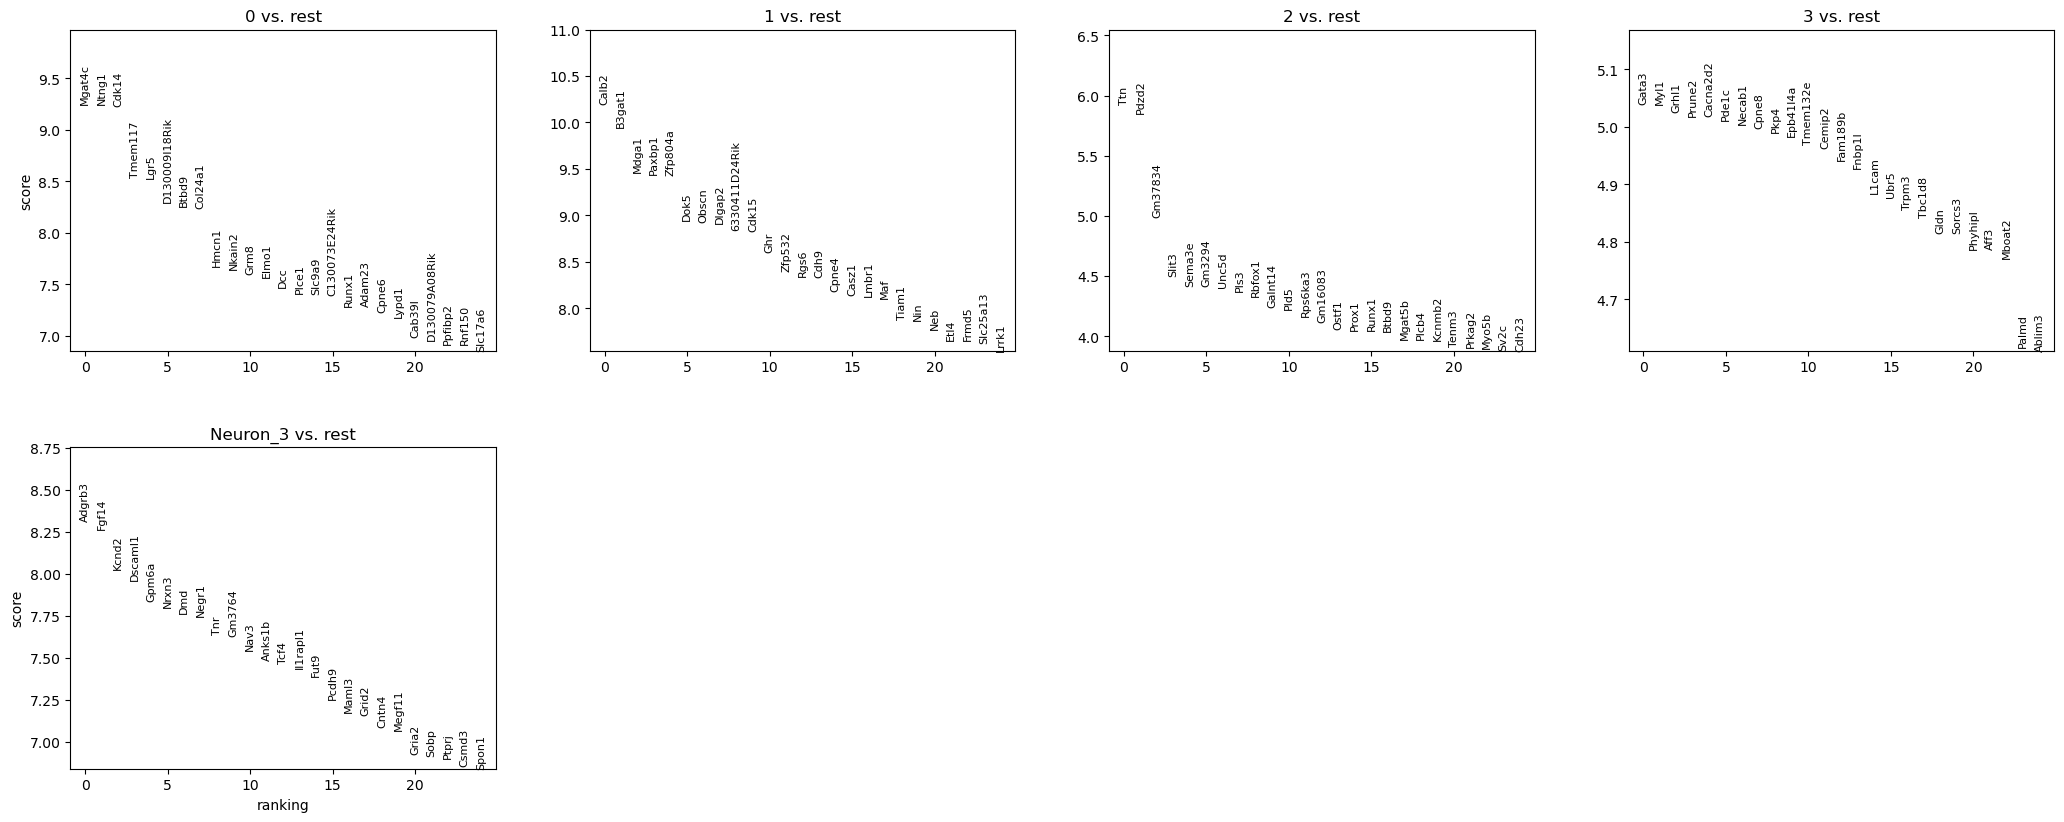

In [38]:
sc.tl.rank_genes_groups(subcluster_remove_brown_pink, 'leiden_old', method='wilcoxon')
sc.pl.rank_genes_groups(subcluster_remove_brown_pink, n_genes=25, sharey=False)

In [39]:
import pandas as pd
#convert marker genes to dataframe
marker_genes=subcluster_remove_brown_pink.uns['rank_genes_groups']['names']
marker_genes=pd.DataFrame(marker_genes)
marker_genes.head(20)

[Executed on 2023-09-13 15:30:06.379504]


0              1        2         3  Neuron_3
0          Mgat4c          Calb2      Ttn     Gata3    Adgrb3
1           Ntng1         B3gat1    Pdzd2      Myl1     Fgf14
2           Cdk14          Mdga1  Gm37834     Grhl1     Kcnd2
3         Tmem117         Paxbp1    Slit3    Prune2   Dscaml1
4            Lgr5        Zfp804a   Sema3e  Cacna2d2     Gpm6a
5   D130009I18Rik           Dok5   Gm3294     Pde1c     Nrxn3
6           Btbd9          Obscn    Unc5d    Necab1       Dmd
7         Col24a1         Dlgap2     Pls3     Cpne8     Negr1
8           Hmcn1  6330411D24Rik   Rbfox1      Pkp4       Tnr
9          Nkain2          Cdk15  Galnt14  Epb41l4a    Gm3764
10           Grm8            Ghr     Pld5  Tmem132e      Nav3
11          Elmo1         Zfp532  Rps6ka3    Cemip2    Anks1b
12            Dcc           Rgs6  Gm16083   Fam189b      Tcf4
13          Plce1           Cdh9    Ostf1    Fnbp1l  Il1rapl1
14         Slc9a9          Cpne4    Prox1     L1cam      Fut9
15  C130073E24Rik          Casz1    Runx1      Ubr5     Pcdh9
16          Runx1          Lmbr1    Btbd9     Trpm3     Maml3
17         Adam23            Maf   Mgat5b    Tbc1d8     Grid2
18          Cpne6          Tiam1    Plcb4      Gldn     Cntn4
19          Lypd1            Nin   Kcnmb2    Sorcs3    Megf11

[Executed on 2023-09-13 16:16:36.135772]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


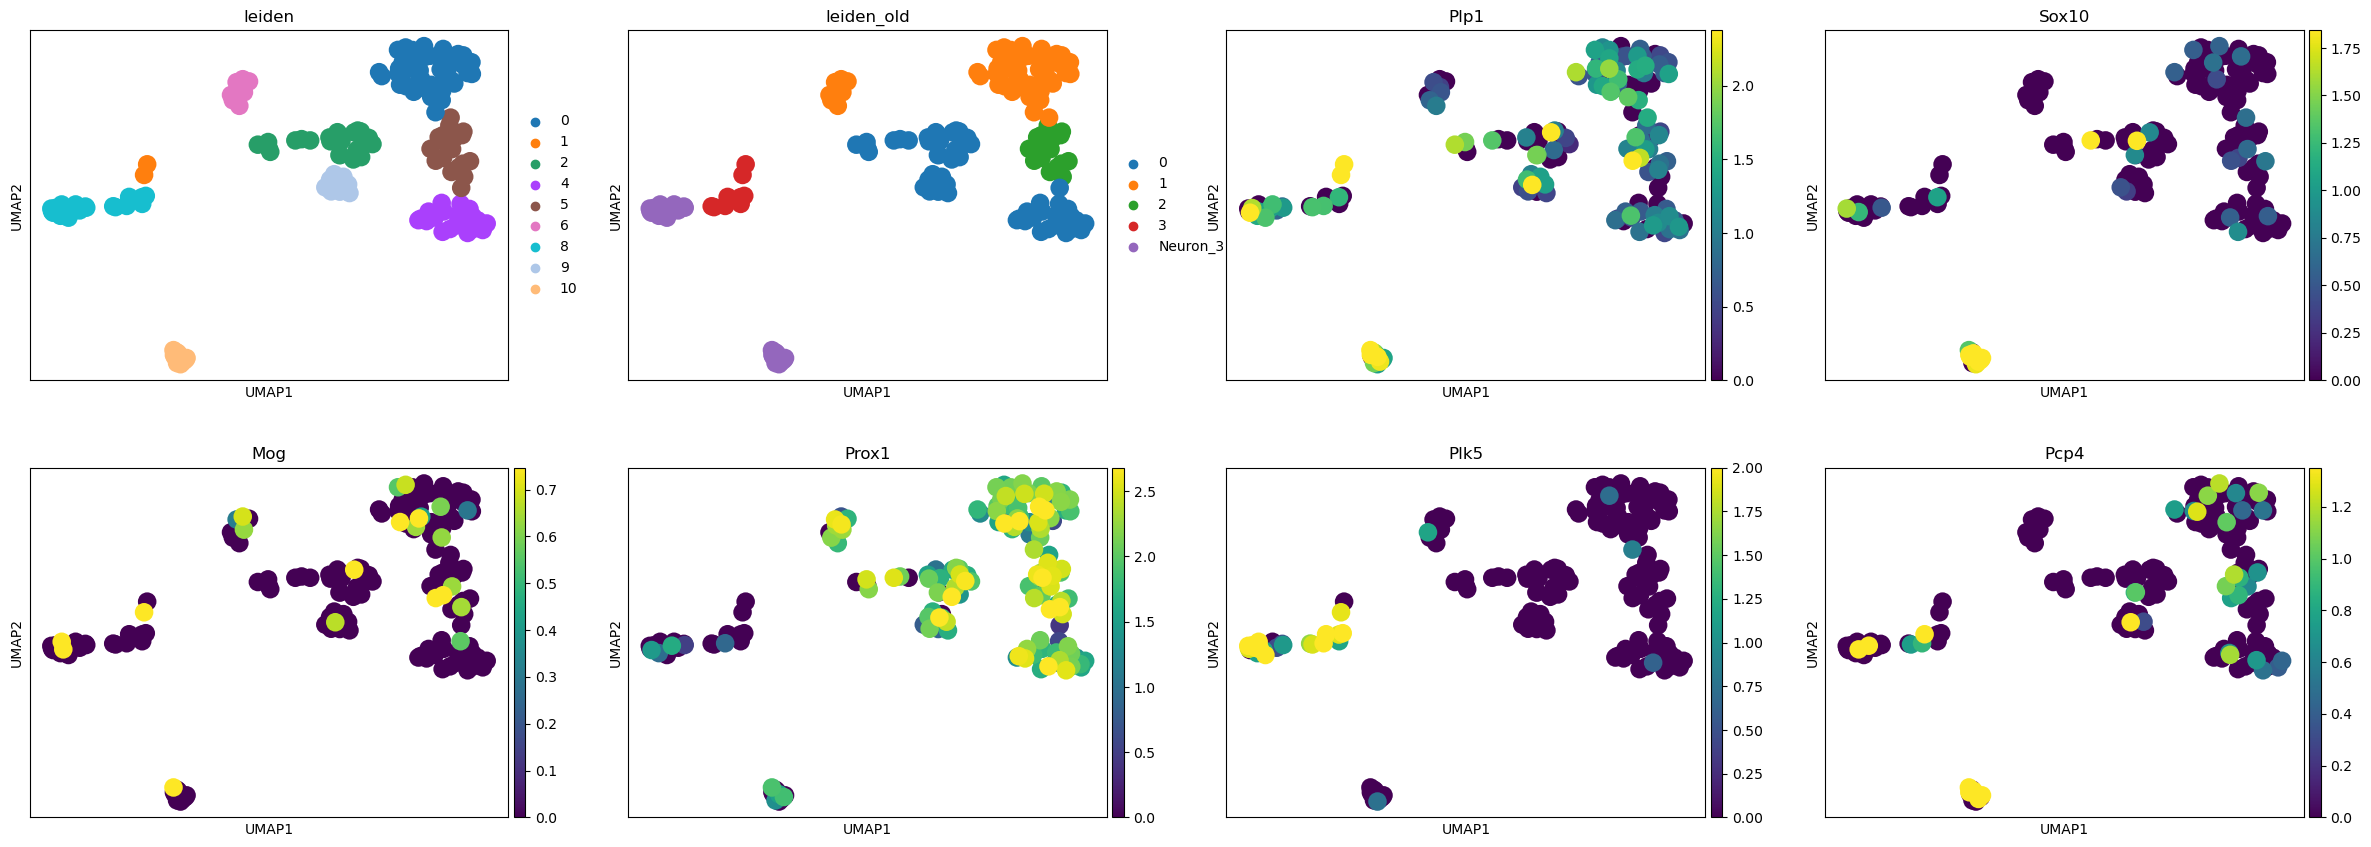

In [59]:
sc.pl.umap(subcluster_remove_brown_pink,color=['leiden','leiden_old','Plp1','Sox10','Mog','Prox1','Plk5','Pcp4'],vmax='p95',layer='log1p')

[Executed on 2023-09-13 16:12:21.878587]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


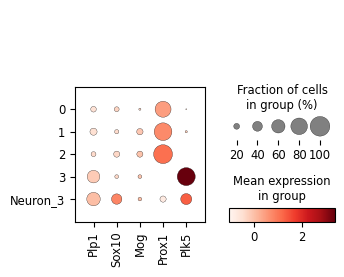

In [55]:
sc.pl.dotplot(subcluster_remove_brown_pink, var_names=['Plp1','Sox10','Mog','Prox1','Plk5'],groupby='leiden_old')

[Executed on 2023-09-13 16:26:56.400404]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


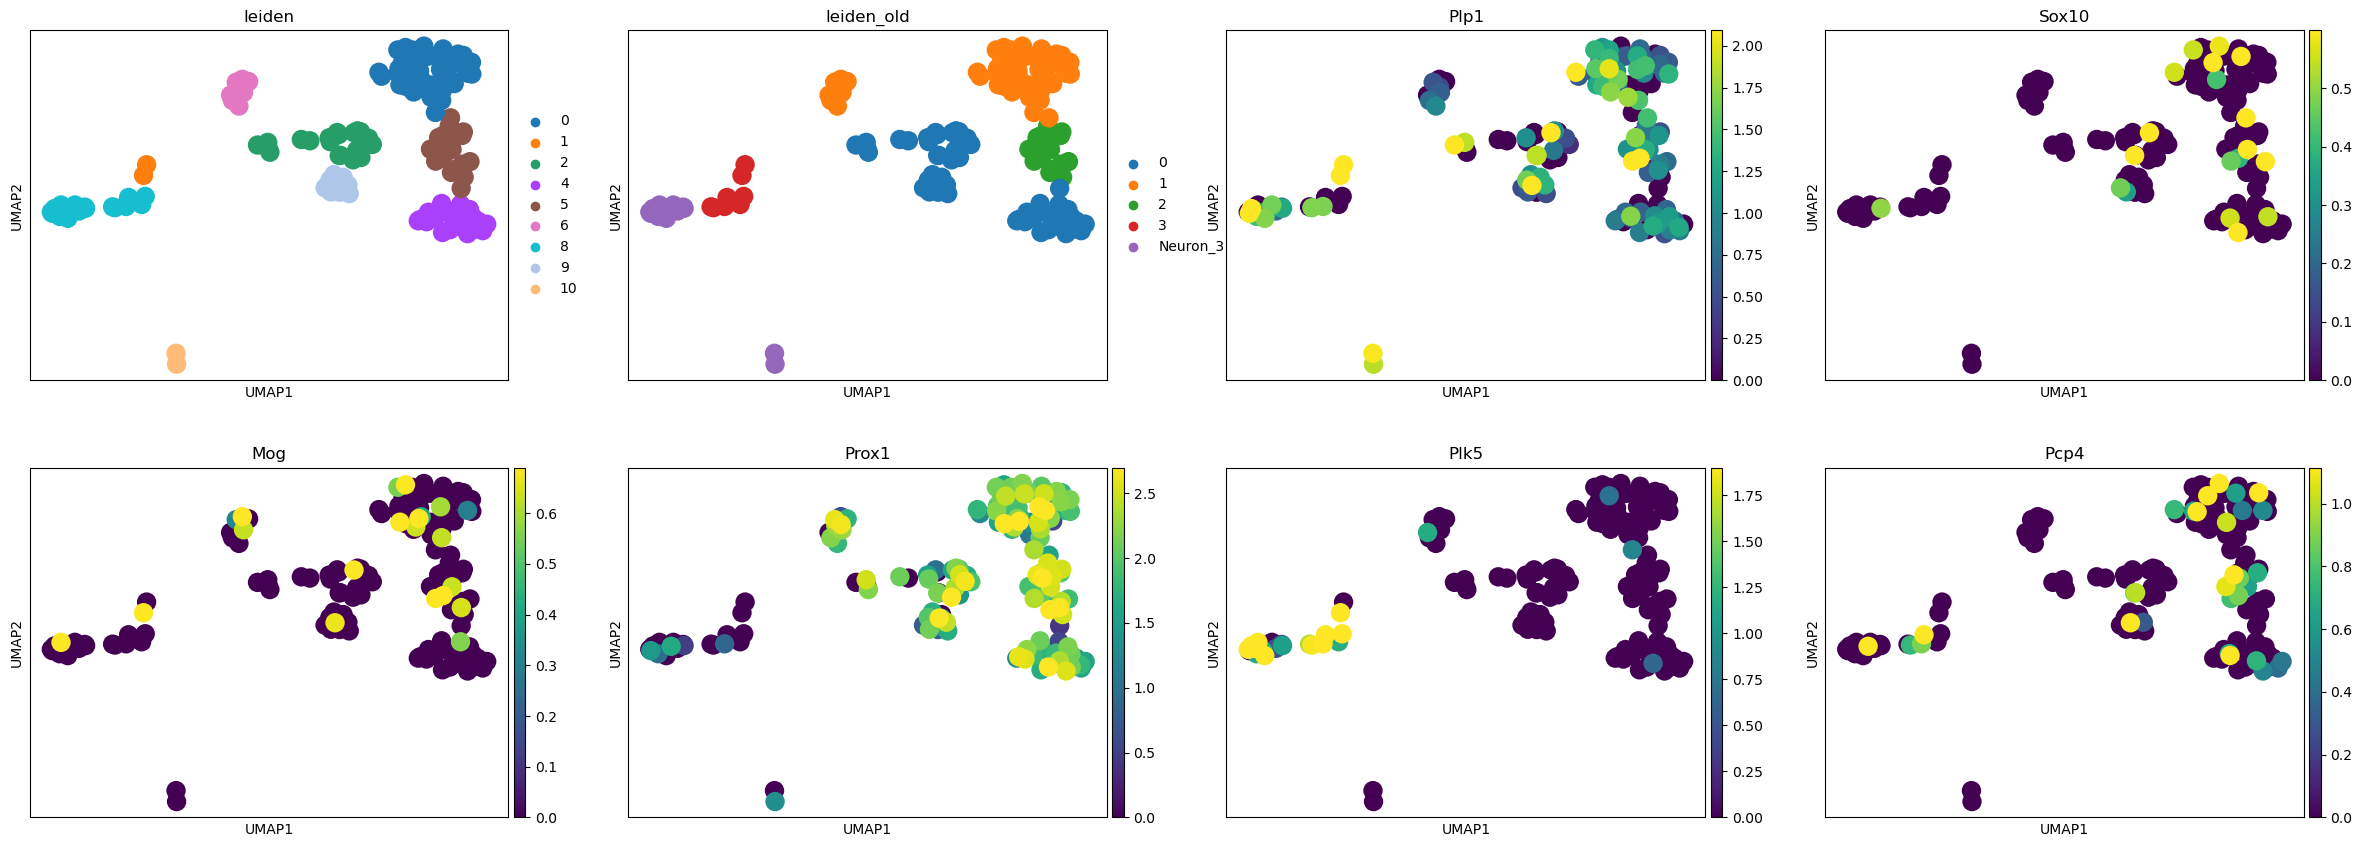

In [64]:
Sox10_values = subcluster_remove_brown_pink[:, subcluster_remove_brown_pink.var_names == 'Sox10'].layers['log1p'].flatten()
mask=Sox10_values>1

finalneuron=subcluster_remove_brown_pink[~mask].copy()

sc.pl.umap(finalneuron,color=['leiden','leiden_old','Plp1','Sox10','Mog','Prox1','Plk5','Pcp4'],vmax='p95',layer='log1p')

In [65]:
subcluster_final_neuron=finalneuron[~finalneuron.obs['leiden_old'].isin(['Neuron_3'])]


[Executed on 2023-09-13 16:27:27.061152]


[Executed on 2023-09-13 16:27:42.117417]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


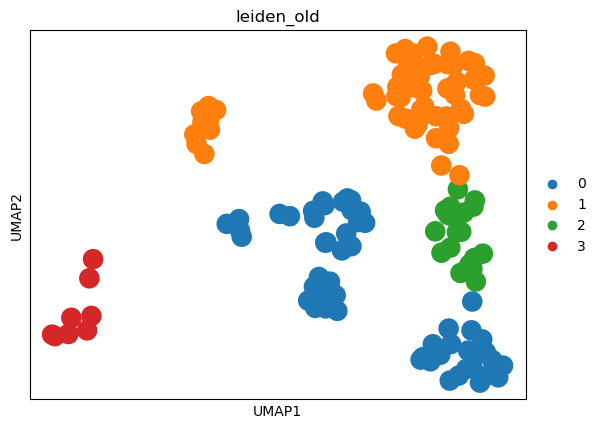

In [66]:
sc.pl.umap(subcluster_final_neuron,color='leiden_old')

In [67]:
subcluster_final_neuron.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/finalneuron.h5ad")

[Executed on 2023-09-13 16:27:53.534109]


In [82]:
subcluster_final_neuron=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/finalneuron.h5ad")

[Executed on 2023-09-13 16:39:53.866290]


[Executed on 2023-09-13 16:40:05.144128]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


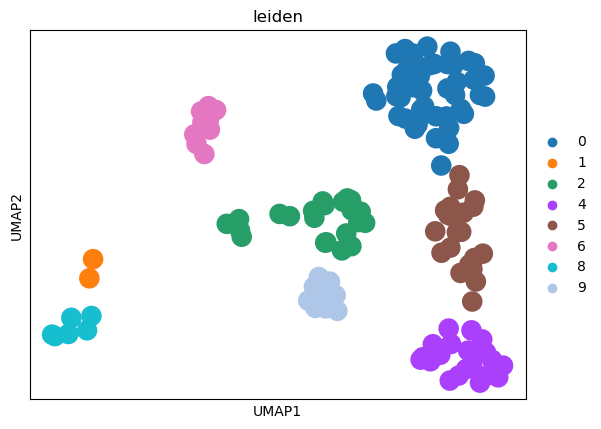

In [84]:
sc.pl.umap(subcluster_final_neuron,color='leiden')

[Executed on 2023-09-13 16:41:20.389340]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


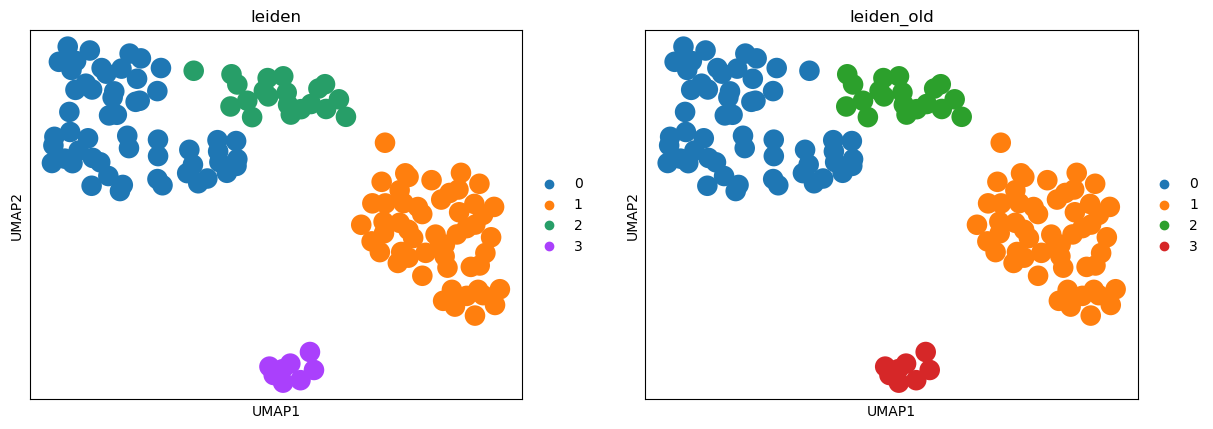

In [86]:
sc.pp.neighbors(subcluster_final_neuron, n_neighbors=15, n_pcs=15)
sc.tl.leiden(subcluster_final_neuron,resolution=0.2)
sc.tl.umap(subcluster_final_neuron,min_dist=0.6)
sc.pl.umap(subcluster_final_neuron,color=['leiden','leiden_old'],vmax='p95',layer='uml')

[Executed on 2023-09-13 16:41:44.764782]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


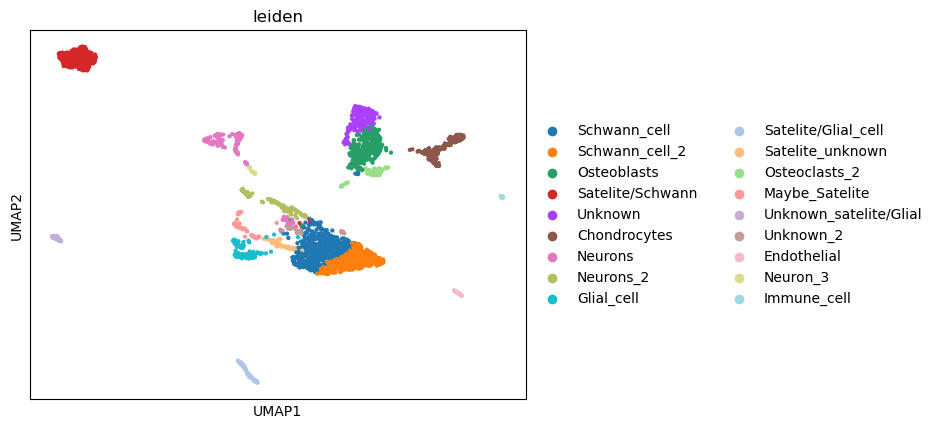

In [87]:
ad_filtered3=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/filter3butfinal.h5ad")

sc.pl.umap(modified,color='leiden')

In [88]:
modified.obs['leiden'].value_counts()

[Executed on 2023-09-13 16:41:47.384372]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
Name: count, dtype: int64

In [89]:
modified[~modified.obs['leiden'].isin(['Neuron_3','Neurons_2','Neurons'])]
modified.obs['leiden'].value_counts()

[Executed on 2023-09-13 16:41:49.817062]


leiden
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   183
Neurons_2                 130
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
Unknown_2                  41
Endothelial                40
Neuron_3                   28
Immune_cell                22
Name: count, dtype: int64

In [90]:
final_with_neuron=sc.concat([modified,subcluster_final_neuron],join='outer')


[Executed on 2023-09-13 16:41:54.634369]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [76]:
final_with_neuron

[Executed on 2023-09-13 16:37:27.075693]


AnnData object with n_obs × n_vars = 3295 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', 'leiden_old', 'leiden_0'
    uns: 'leiden_colors', 'leiden_old_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'umi', 'log1p', 'Scale'

[Executed on 2023-09-13 16:42:00.710812]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


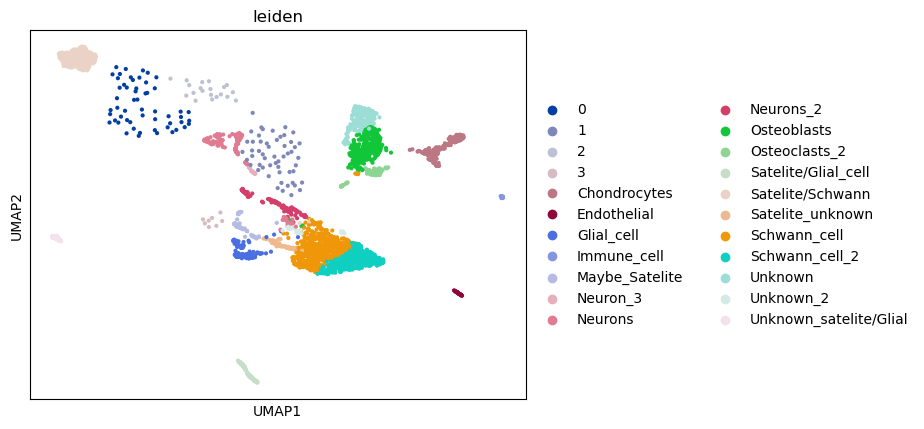

In [91]:
sc.pl.umap(final_with_neuron,color='leiden')

In [92]:
final_with_neuron.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/final_with_neuronIII.h5ad")

[Executed on 2023-09-13 16:42:32.720877]


[Executed on 2023-09-13 16:24:52.237686]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


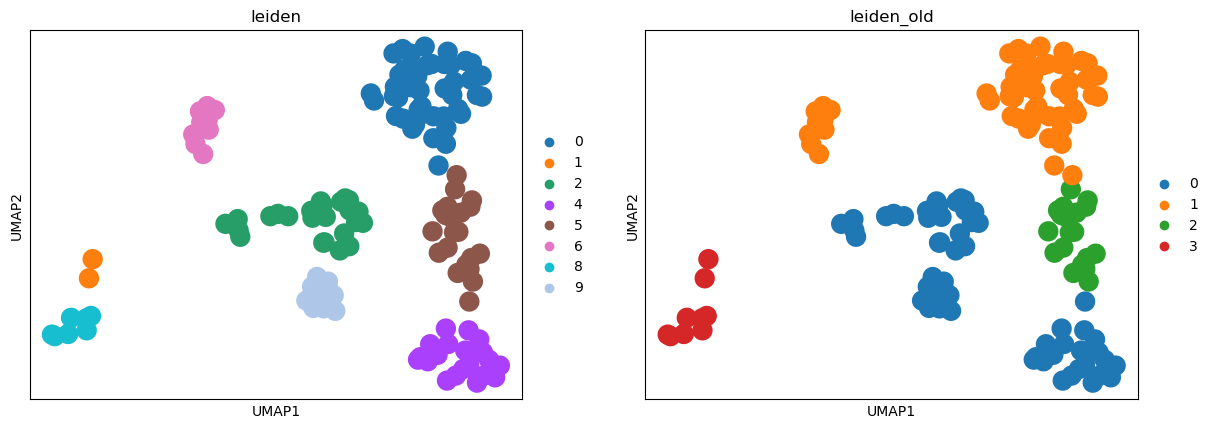

In [61]:
sc.pl.umap(subcluster_final_neuron,color=['leiden','leiden_old',],vmax='p95',layer='log1p')

[Executed on 2023-09-13 15:21:57.867314]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


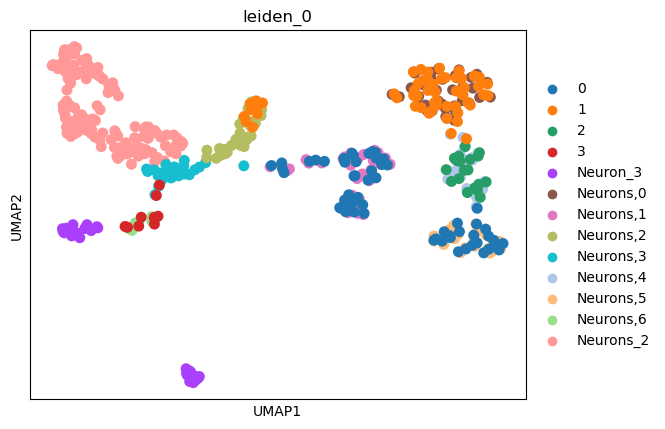

In [30]:
sc.tl.leiden(subcluster,resolution=0.4,restrict_to=('leiden_old',['Neurons']), key_added='leiden_0')
sc.pl.umap(subcluster,color=['leiden_0'])

In [15]:
neurons_2=subcluster[subcluster.obs['leiden_old'].isin(['Neurons_2'])].copy()
subsubcluster=subcluster[~subcluster.obs['leiden_old'].isin(['Neurons_2','Neuron_3'])].copy()

[Executed on 2023-09-13 15:03:18.269320]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


[Executed on 2023-09-11 14:40:01.959516]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


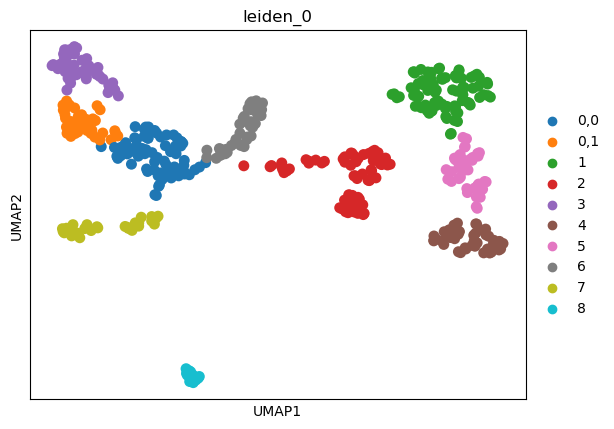

In [144]:
sc.tl.leiden(subcluster,resolution=0.2,restrict_to=('leiden',['0']), key_added='leiden_0')
sc.pl.umap(subcluster,color=['leiden_0'])

[Executed on 2023-09-11 14:40:02.385083]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


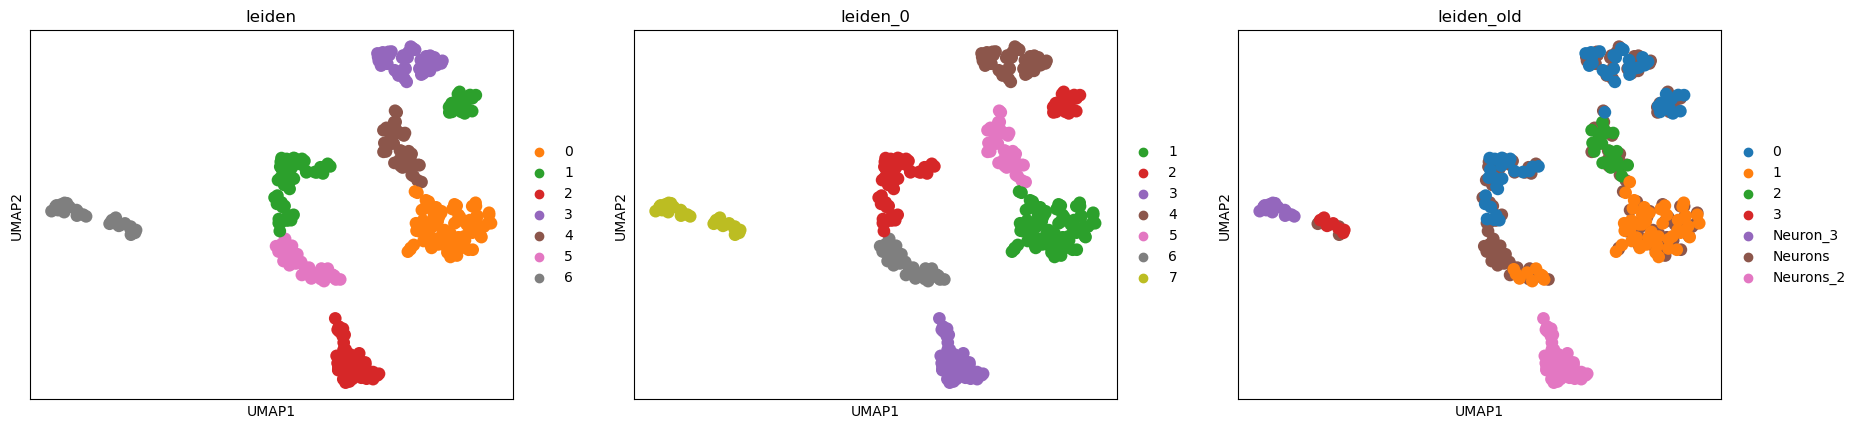

In [145]:
subsubcluster=subcluster[~subcluster.obs.leiden_0.isin(['0,0','0,1','8'])].copy()
sc.pp.neighbors(subsubcluster, n_neighbors=15, n_pcs=15)
sc.tl.leiden(subsubcluster,resolution=0.3)
sc.tl.umap(subsubcluster,min_dist=0.6)
sc.pl.umap(subsubcluster,color=['leiden','leiden_0','leiden_old'],vmax='p95',layer='log1p')

[Executed on 2023-09-11 14:40:09.385715]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


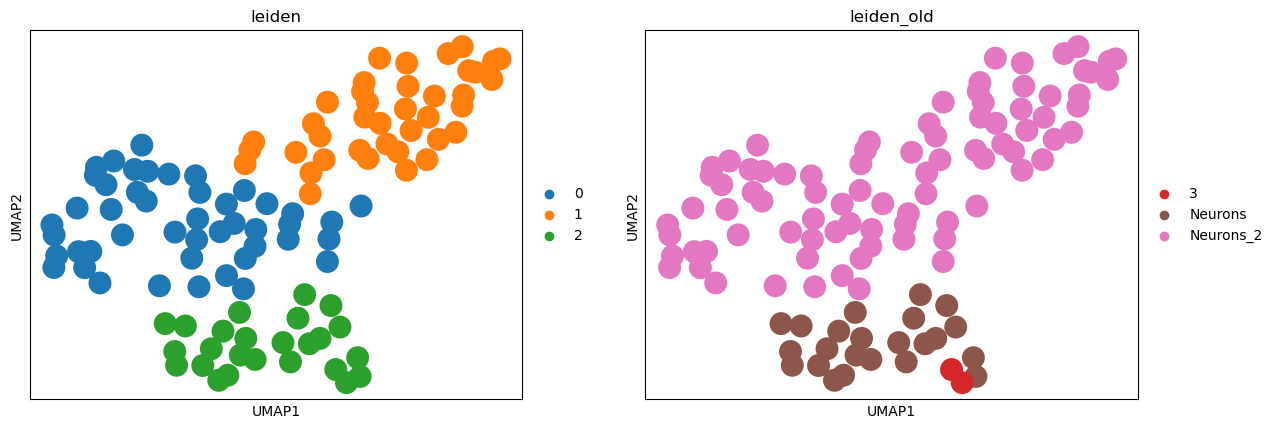

In [146]:
group1_neuron=subcluster[subcluster.obs['leiden'].isin(['0'])].copy()
sc.pp.neighbors(group1_neuron, n_neighbors=15, n_pcs=15)
sc.tl.leiden(group1_neuron,resolution=0.3)
sc.tl.umap(group1_neuron,min_dist=0.6)
sc.pl.umap(group1_neuron,color=['leiden','leiden_old'],vmax='p95',layer='log1p')

[Executed on 2023-09-11 14:40:13.547704]


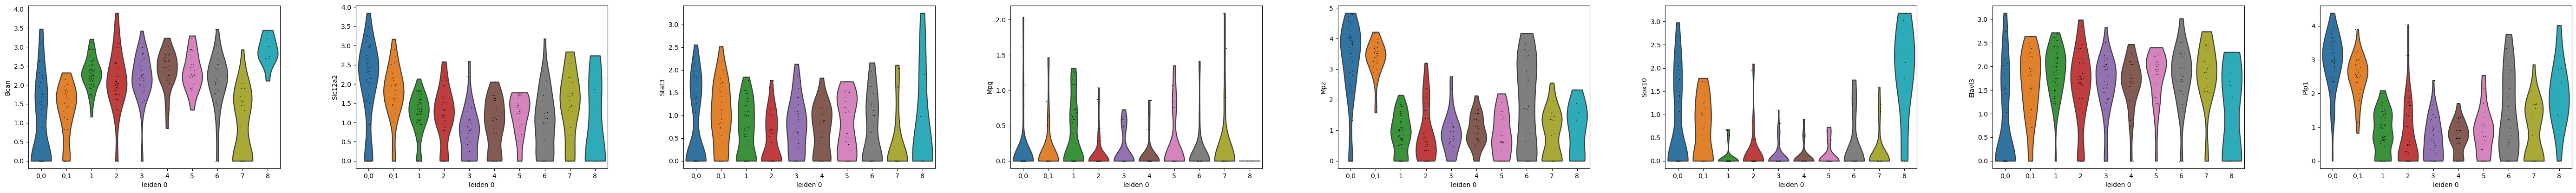

In [147]:
Schwann=['Bcan','Slc12a2','Stat3','Mpg','Mpz','Sox10','Elavl3','Plp1']
#sc.pl.umap(subcluster,color=Schwann,vmax='p95',layer='log1p',legend_loc='on data')
sc.pl.violin(subcluster, Schwann, groupby='leiden_0',layer='log1p',vmax='p95',ncols=2)

[Executed on 2023-09-11 14:40:16.335918]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


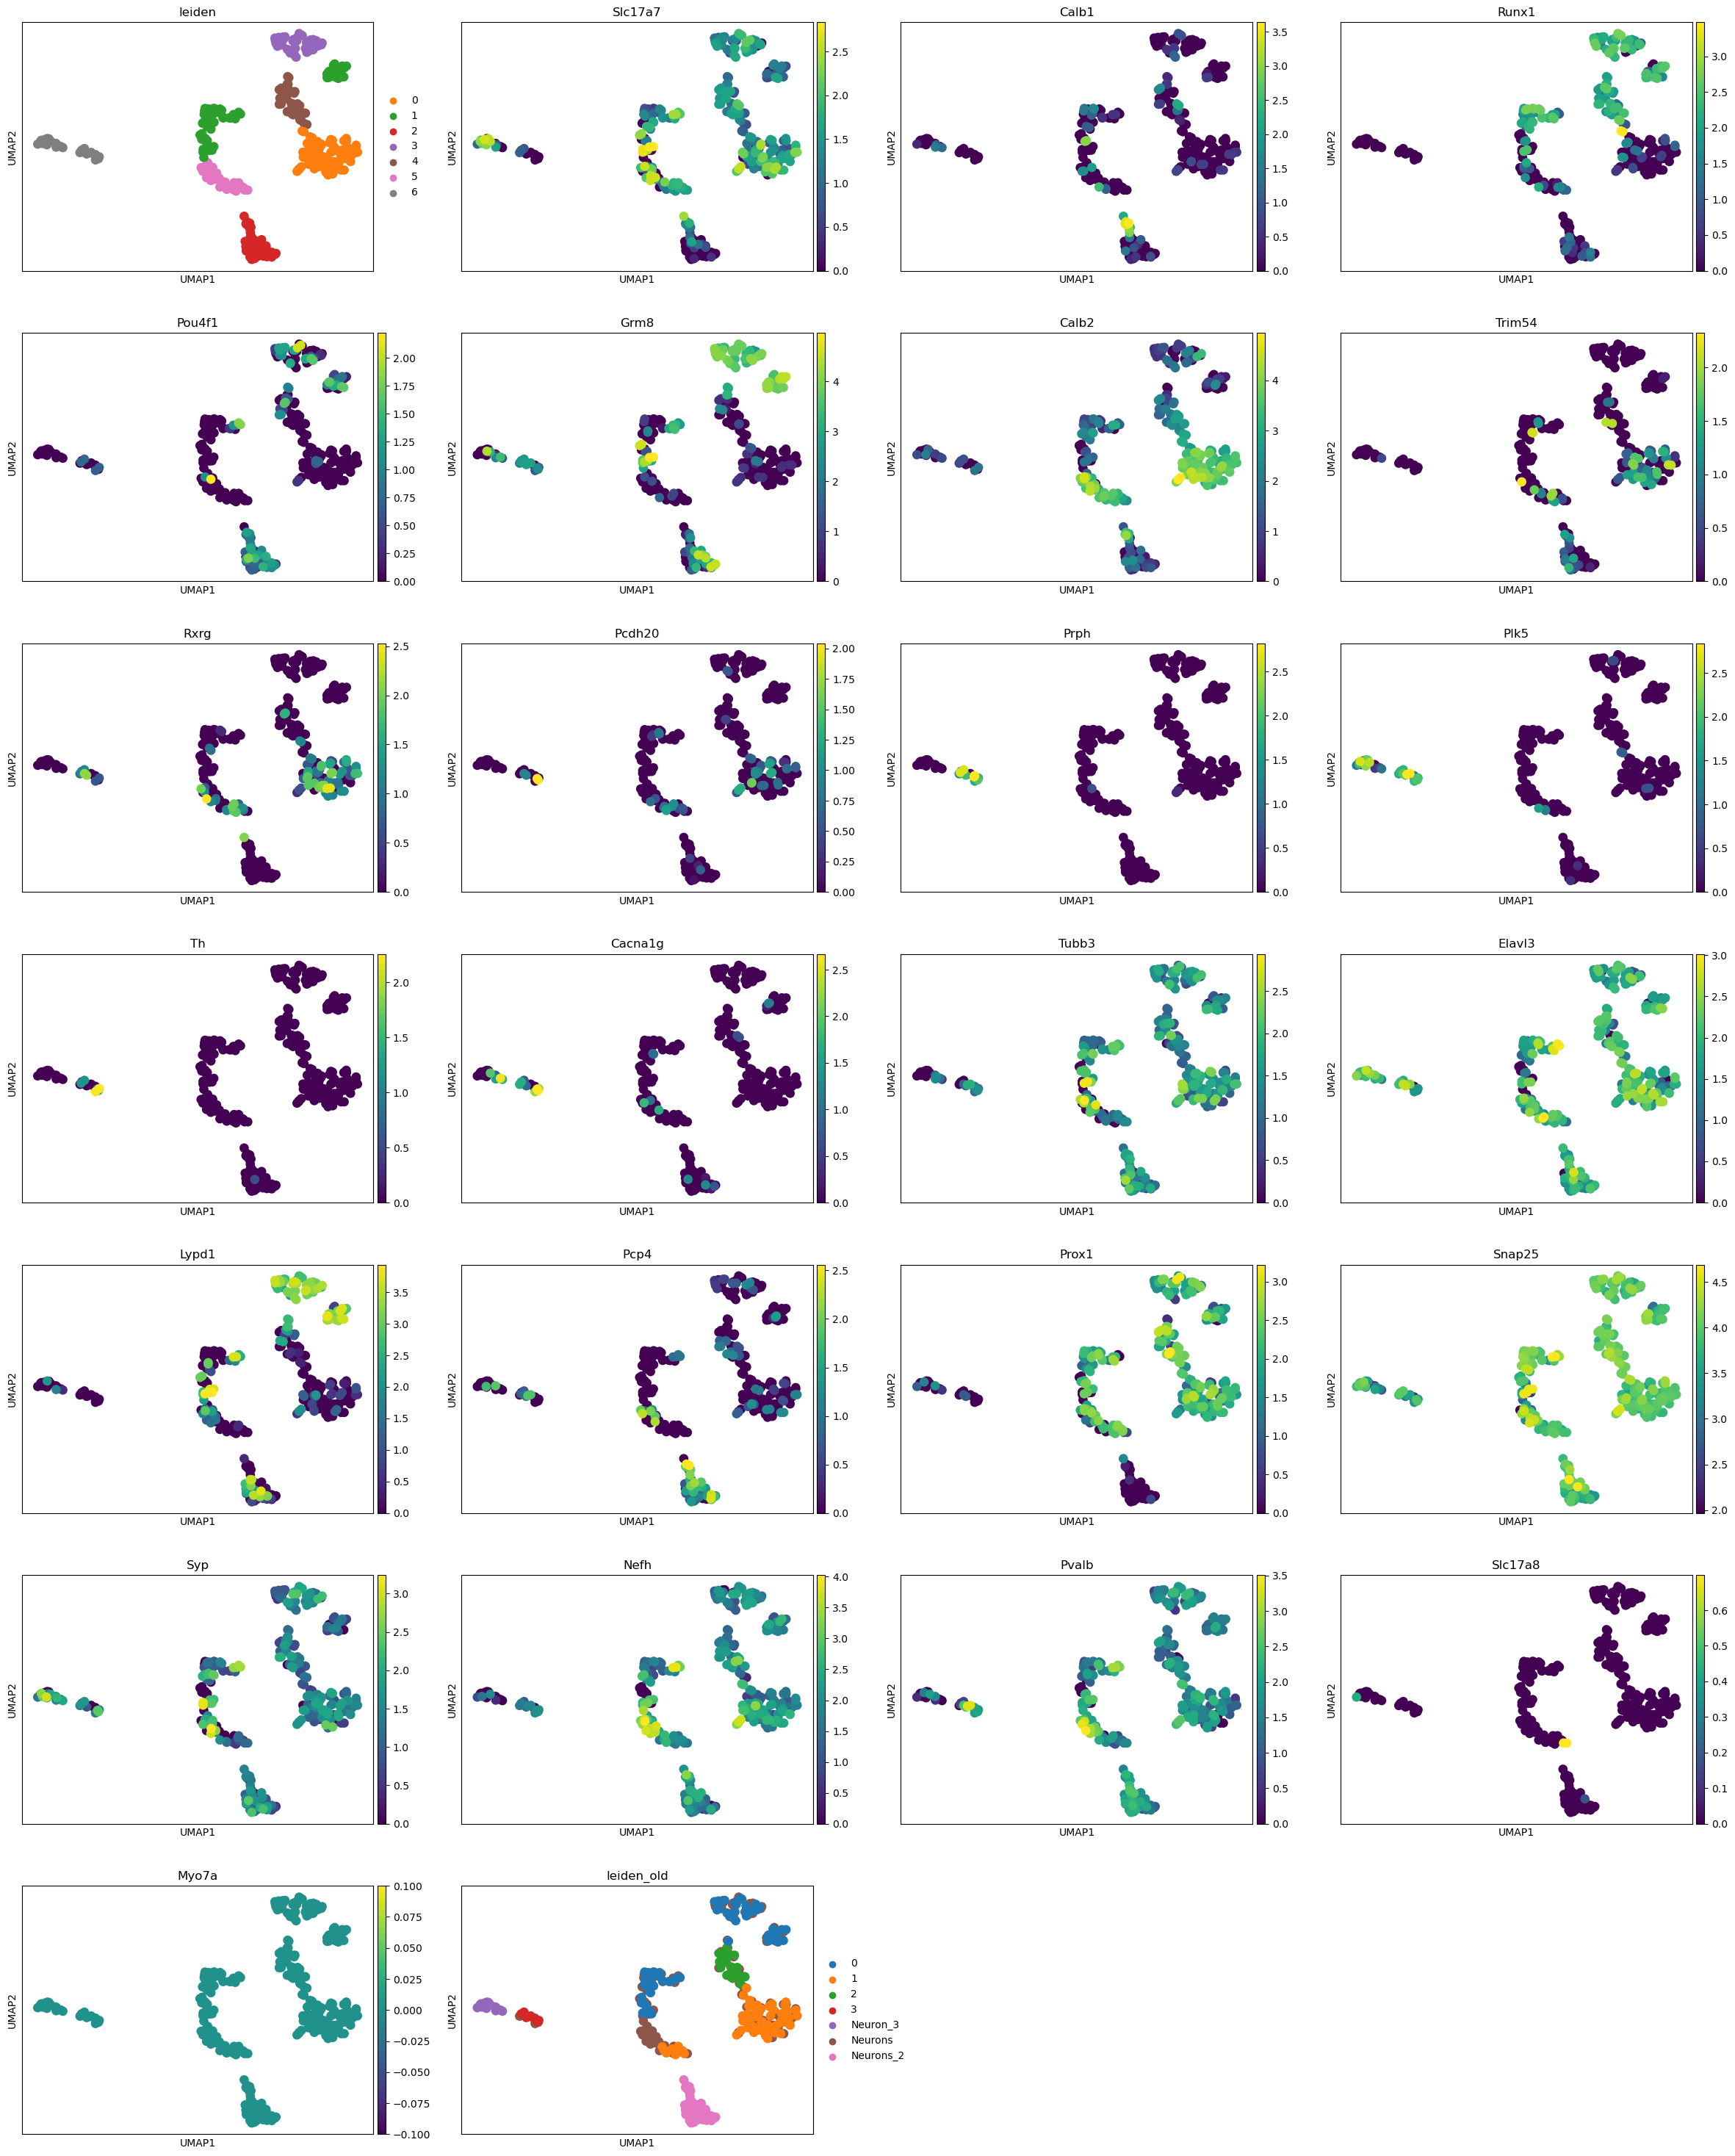

In [148]:
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Th','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a','leiden_old']
sc.pl.umap(subsubcluster,color=neuron_cell_markers,layer='log1p')

In [149]:
subsubcluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/subsubset.h5ad")

[Executed on 2023-09-11 14:40:29.547850]


In [150]:
subsubcluster=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/subsubset.h5ad")

[Executed on 2023-09-11 14:40:30.005775]


[Executed on 2023-09-11 14:40:30.273186]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


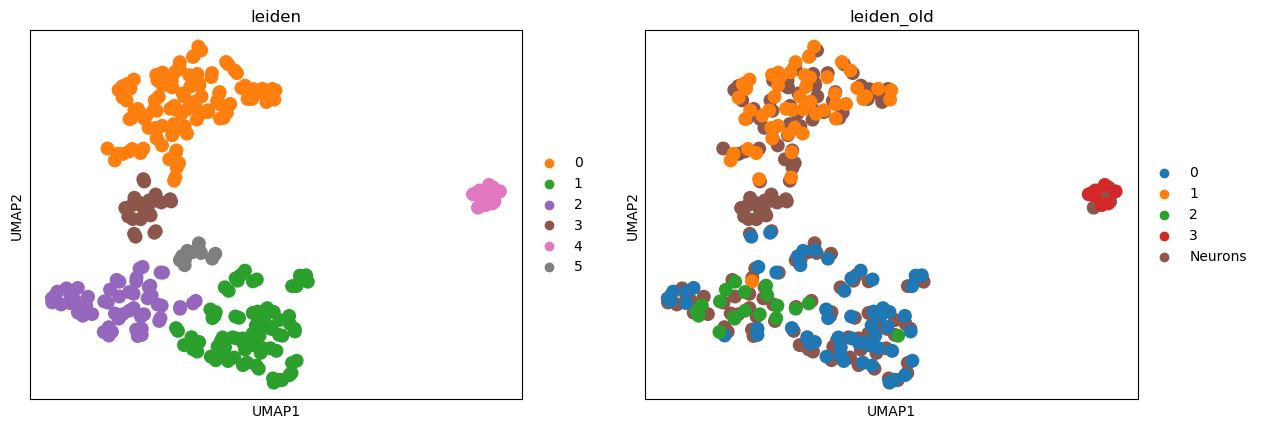

In [151]:
subsubsubcluster=subsubcluster[~subsubcluster.obs['leiden_old'].isin(['Neuron_3','Neurons_2'])].copy()
subsubsubcluster.raw = subsubsubcluster
sc.pp.filter_genes(subsubsubcluster,min_cells=10)
sc.pp.highly_variable_genes(subsubsubcluster,n_top_genes=800,flavor='seurat_v3',layer='umi')
sc.pp.pca(subsubsubcluster,svd_solver='arpack')
sc.pp.neighbors(subsubsubcluster, n_neighbors=15, n_pcs=15,metric='cosine')
sc.tl.leiden(subsubsubcluster,resolution=0.3)
sc.tl.umap(subsubsubcluster,min_dist=0.6)
sc.pl.umap(subsubsubcluster,color=['leiden','leiden_old'],vmax='p95',layer='log1p')


In [152]:
subsubsubcluster

[Executed on 2023-09-11 14:40:33.772245]


AnnData object with n_obs × n_vars = 298 × 19256
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', 'leiden_old', 'leiden_0'
    var: 'mean', 'std', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'leiden', 'leiden_0_colors', 'leiden_colors', 'leiden_new_colors', 'leiden_old_colors', 'log1p', 'neighbors', 'umap', 'hvg', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-11 14:40:33.831838]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key Slc17a8 in .var_names or .obs.columns.'

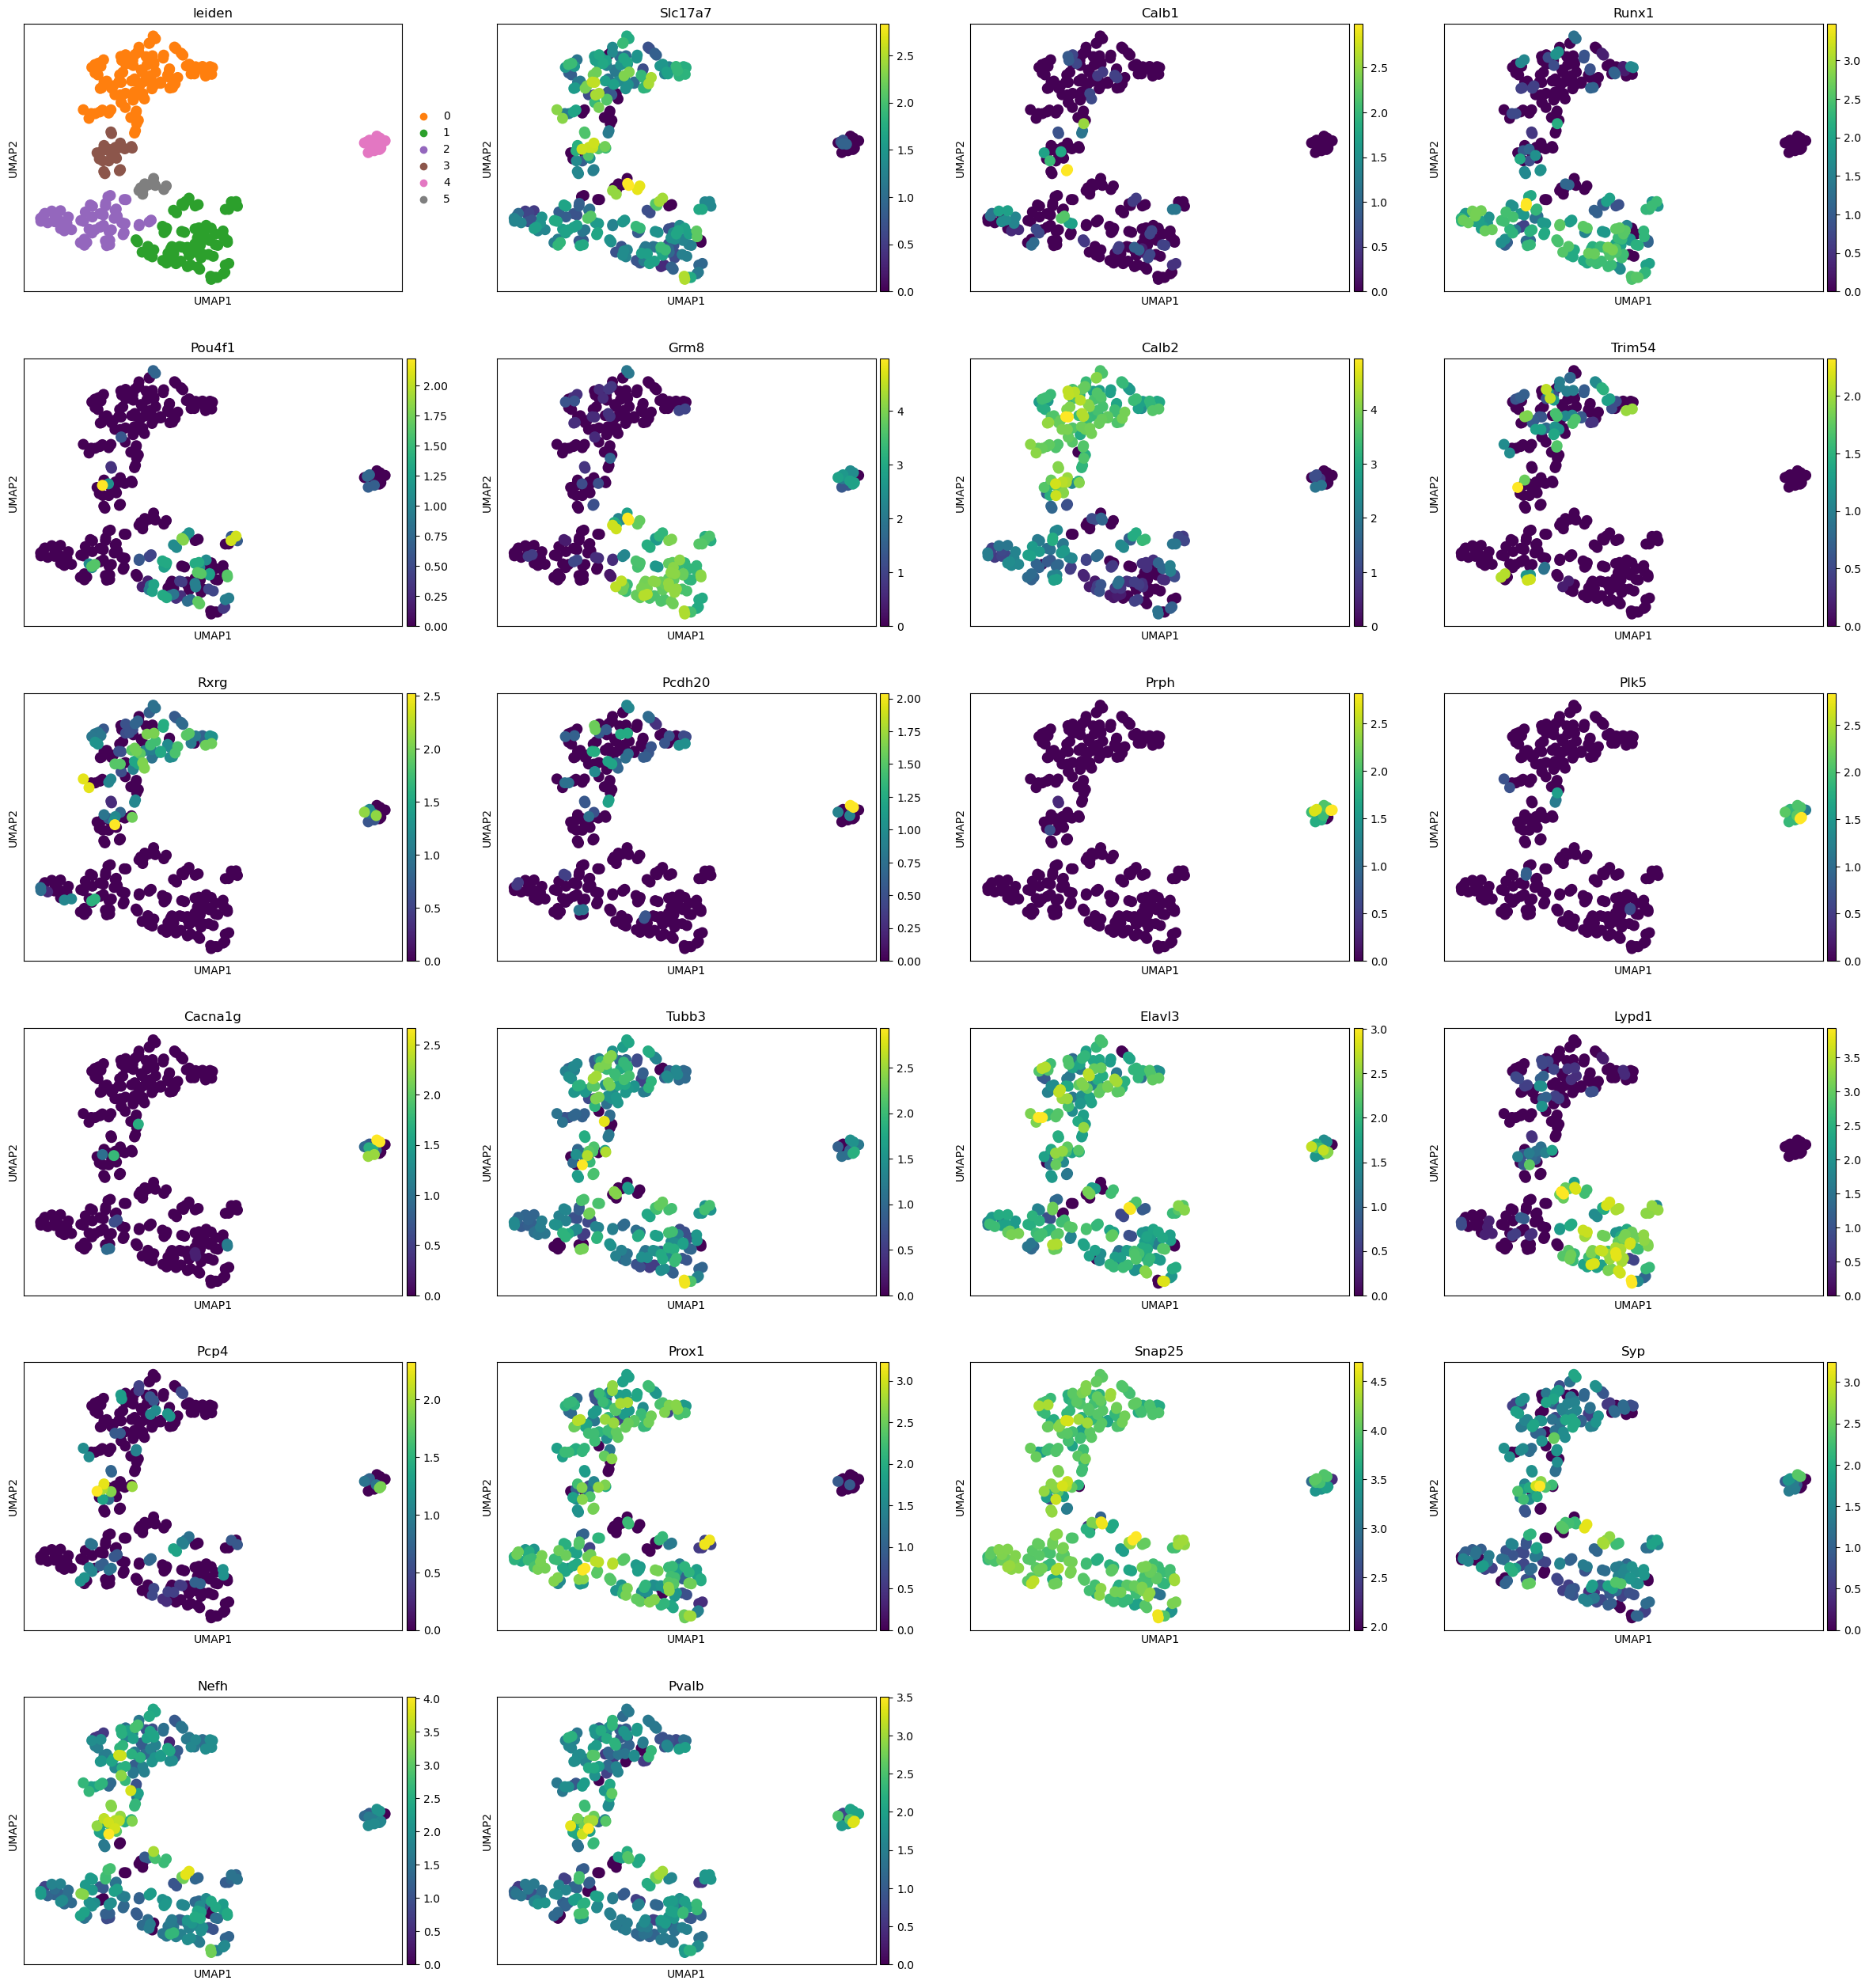

In [153]:
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a','leiden_old']
sc.pl.umap(subsubsubcluster,color=neuron_cell_markers,layer='log1p')

[Executed on 2023-09-11 14:40:54.985500]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key Slc17a8 in .var_names or .obs.columns.'

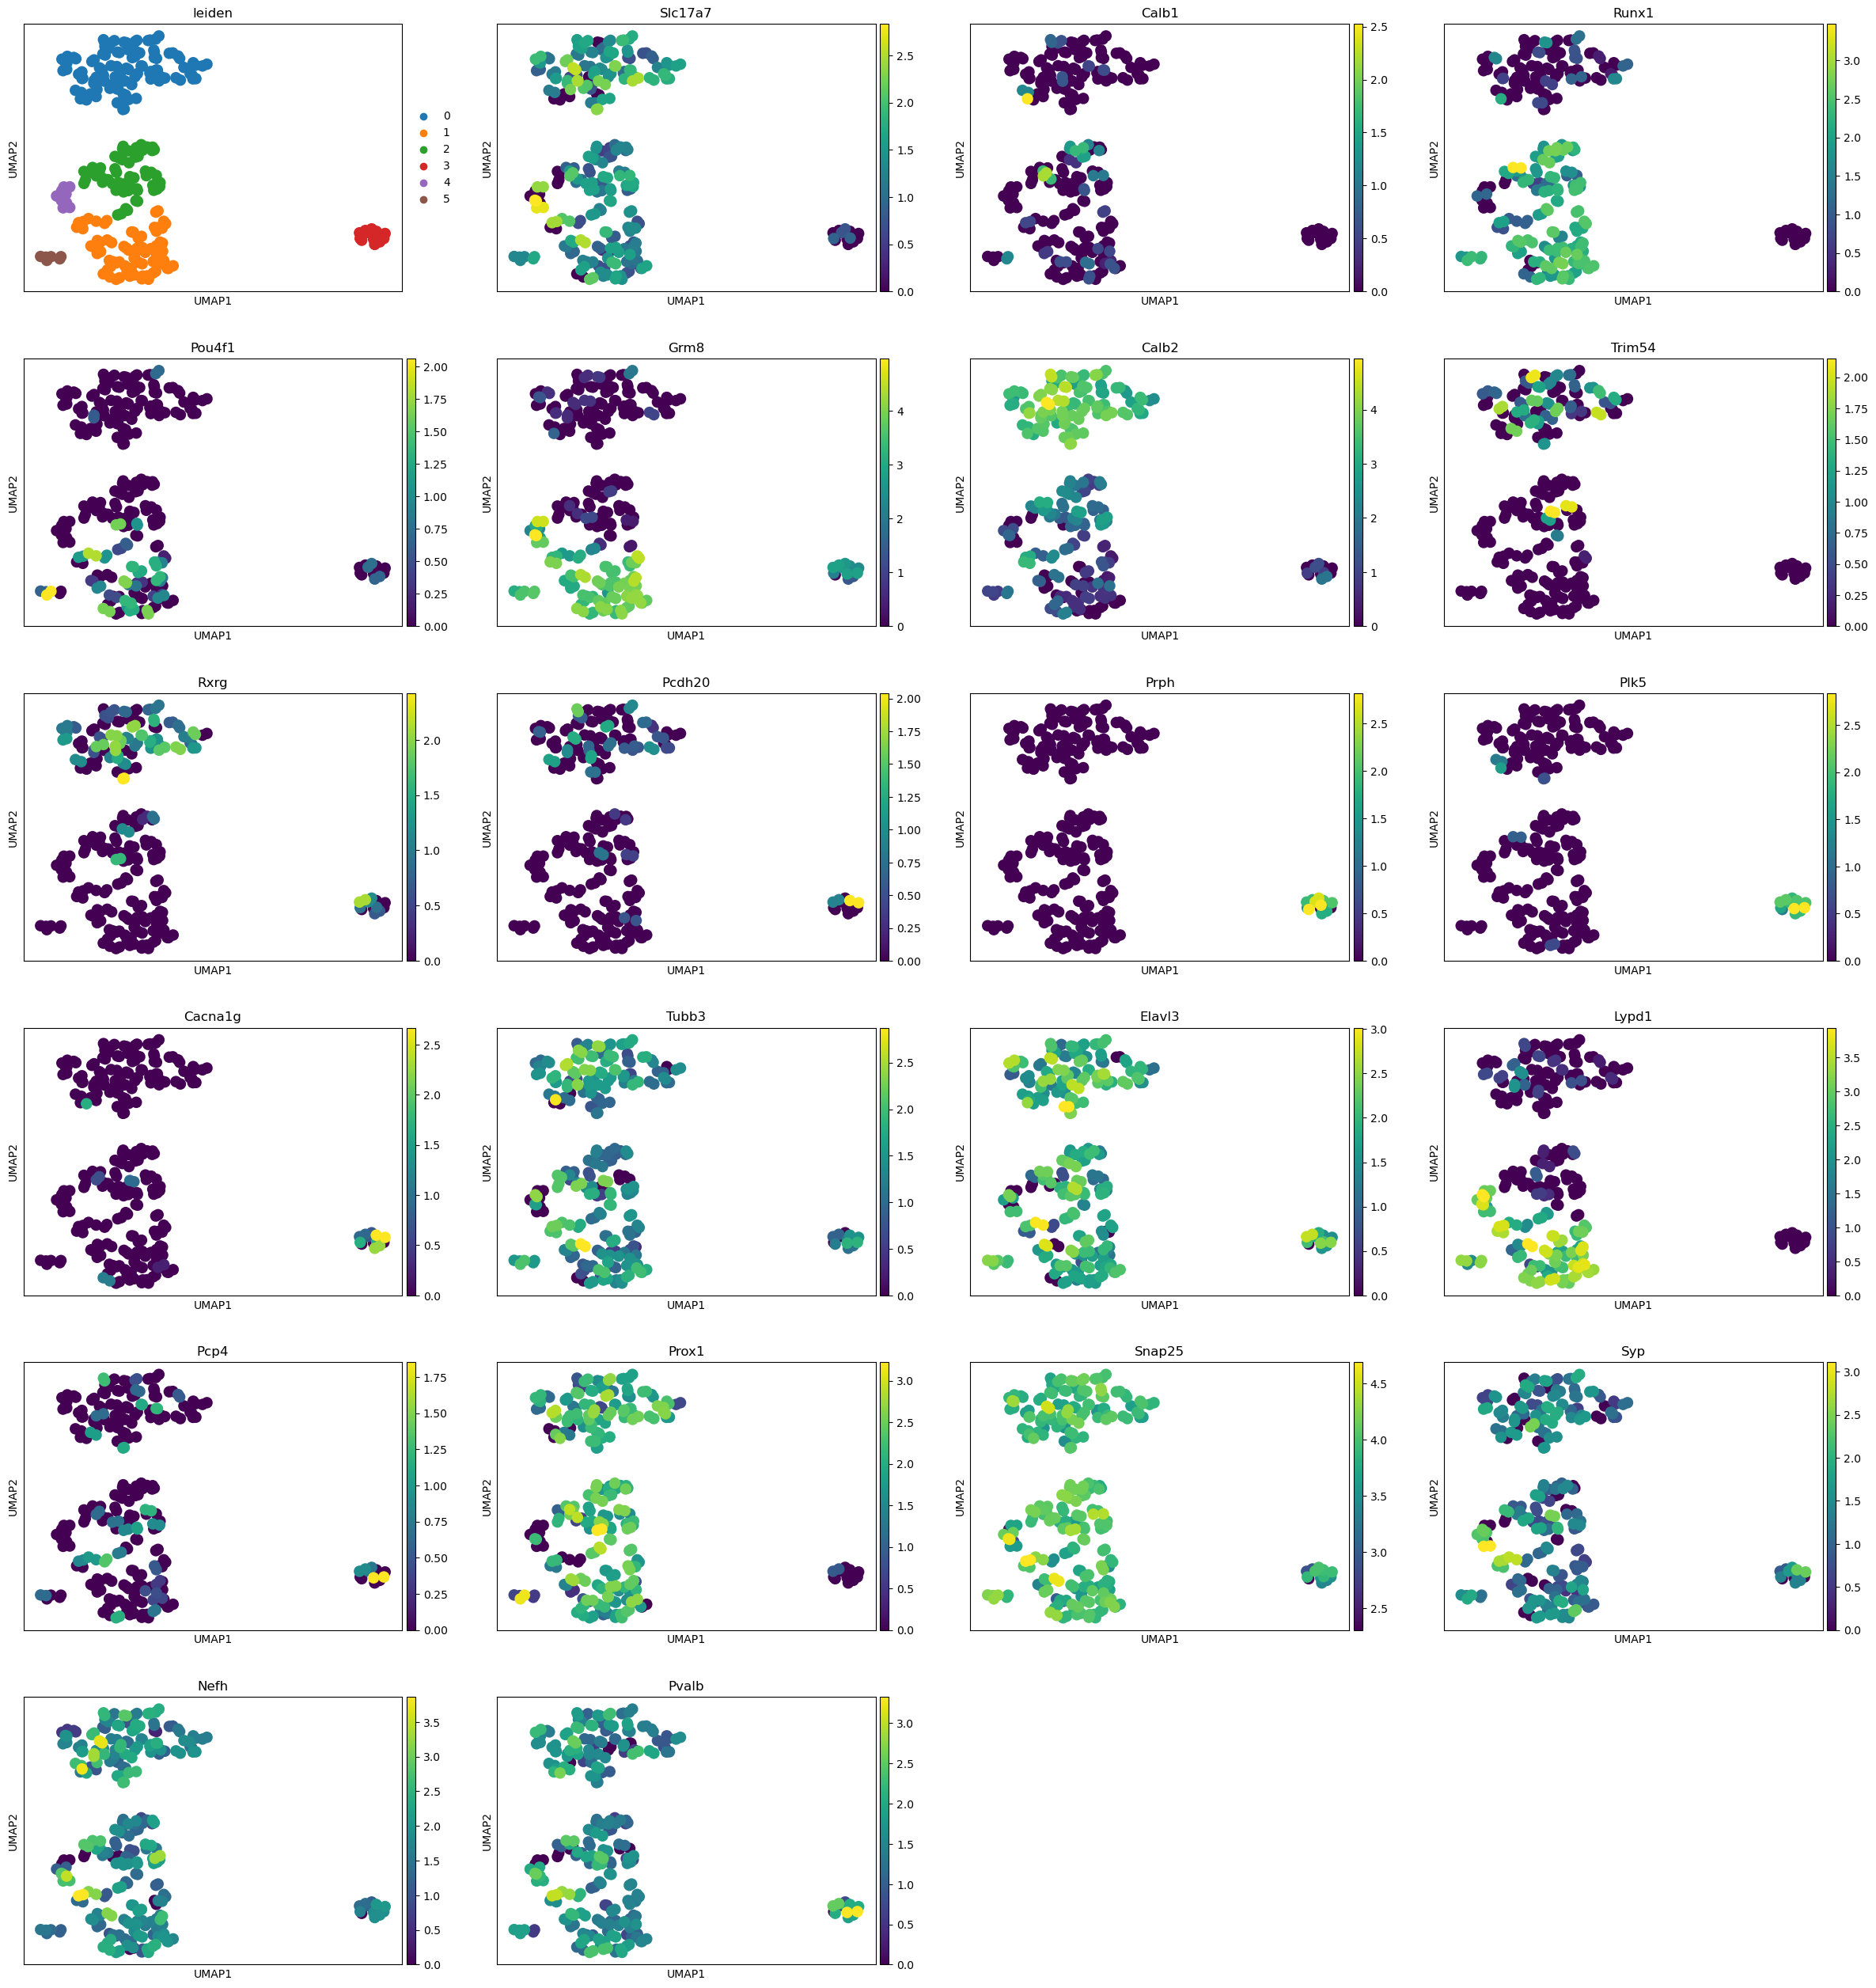

In [156]:
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a','leiden_old']
sc.pl.umap(subx4cluster,color=neuron_cell_markers,layer='log1p')

[Executed on 2023-09-11 14:40:51.377125]


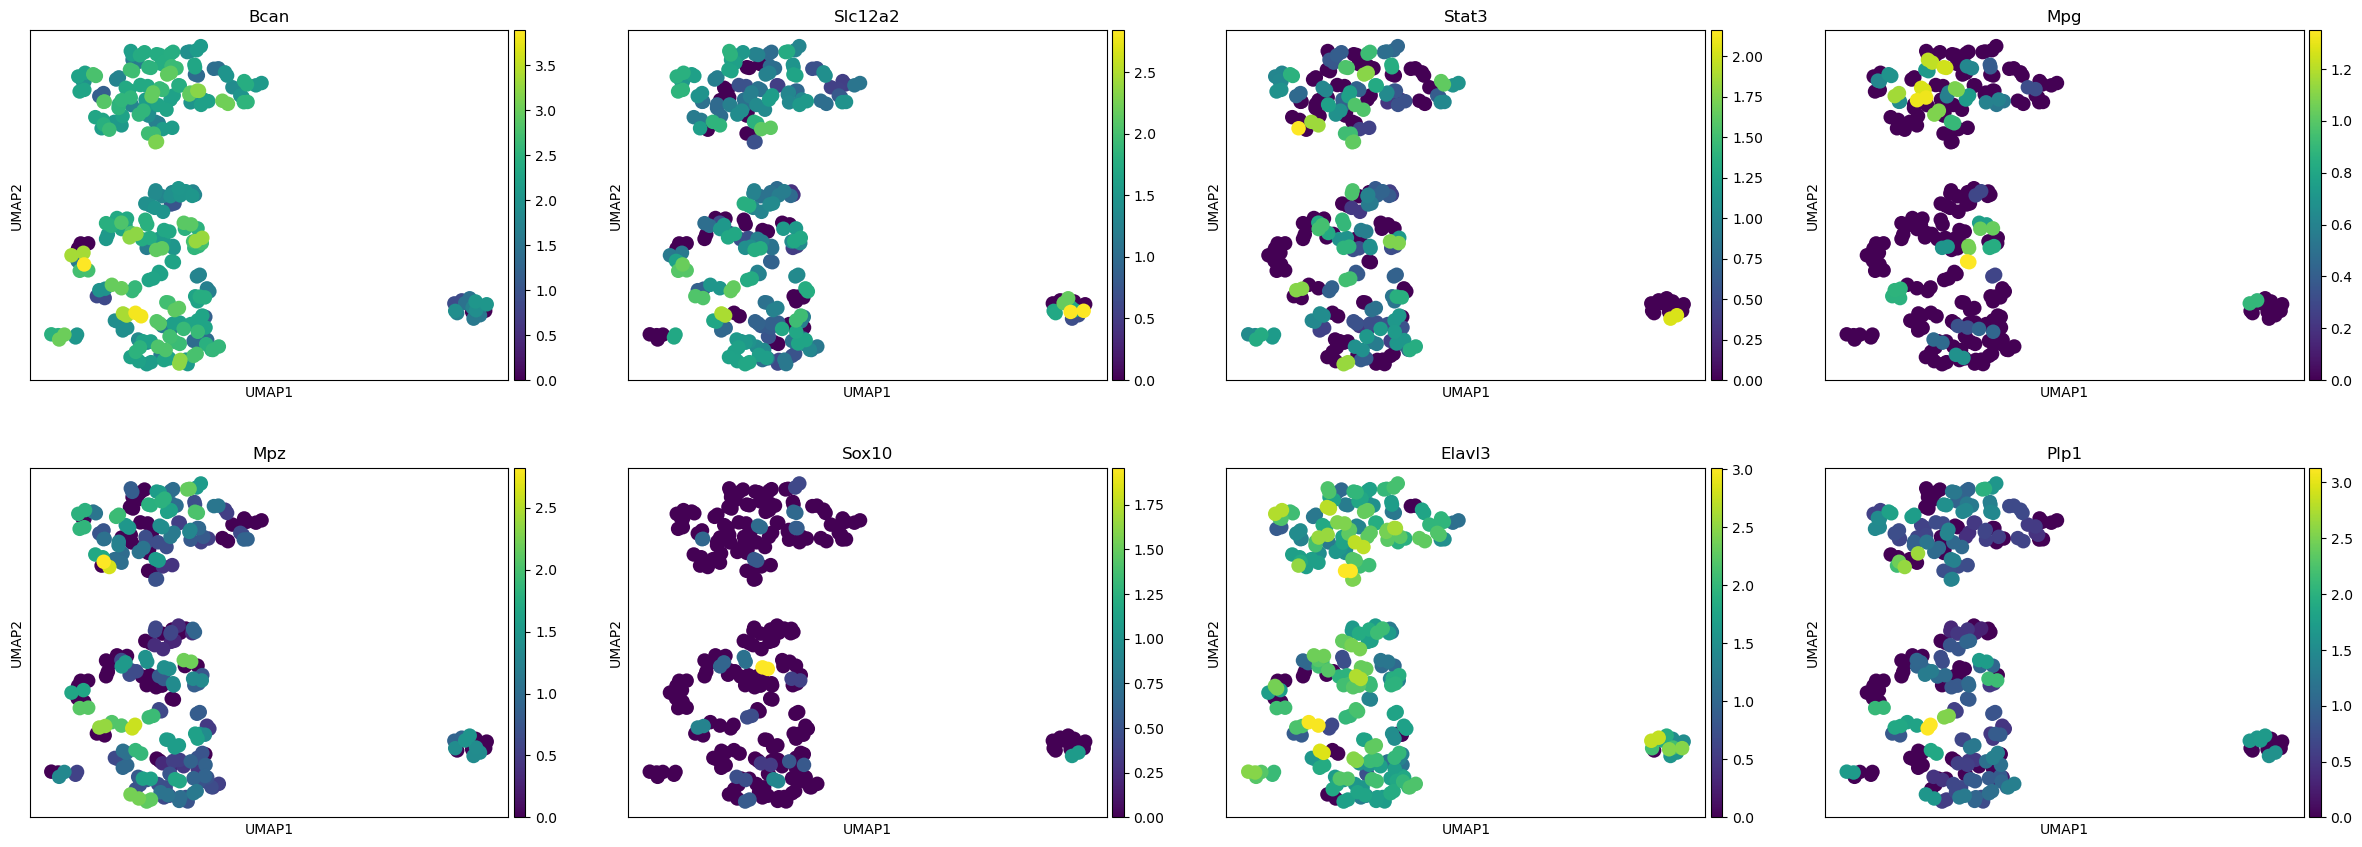

In [155]:
sc.pl.umap(subx4cluster,color=Schwann,layer='log1p')

[Executed on 2023-09-11 14:40:48.763261]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


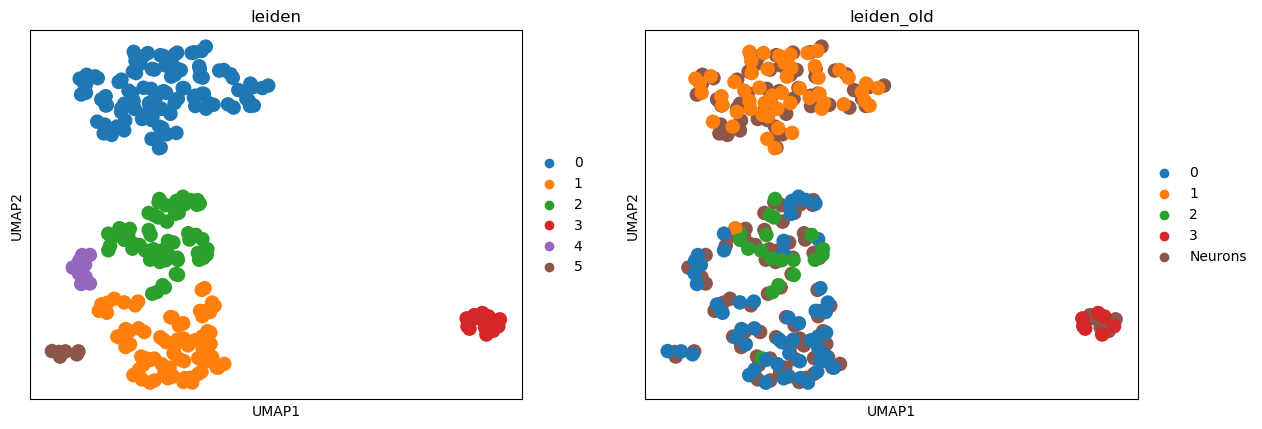

In [154]:
subx4cluster=subsubsubcluster[~subsubsubcluster.obs['leiden'].isin(['3'])].copy()
sc.pp.neighbors(subx4cluster, n_neighbors=15, n_pcs=15,metric='cosine')
sc.tl.leiden(subx4cluster,resolution=0.3)
sc.tl.umap(subx4cluster,min_dist=0.6)
sc.pl.umap(subx4cluster,color=['leiden','leiden_old'],vmax='p95',layer='log1p')


In [176]:
subx4cluster.obs['leiden'].value_counts()

[Executed on 2023-09-11 14:57:22.873856]


leiden
0    108
1     76
2     60
3     14
4     11
5      6
Name: count, dtype: int64

In [169]:
combined.obs['leiden_new'] = combined.obs['leiden'].astype(str).copy()
combined.obs.leiden_new.loc[subx4cluster.obs_names] = subx4cluster.obs['leiden'].astype(str).copy()

[Executed on 2023-09-11 14:48:51.917123]


/scratch/41013420/ipykernel_11459/3316888103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined.obs.leiden_new.loc[subx4cluster.obs_names] = subx4cluster.obs['leiden'].astype(str).copy()


[Executed on 2023-09-11 15:00:00.838731]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


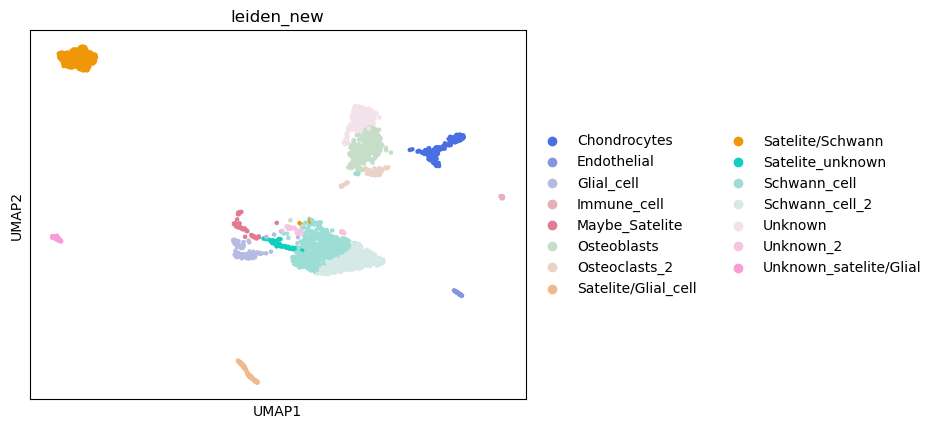

In [179]:
combined_new = combined[~combined.obs['leiden_new'].isin(['0', '1', '2', '3', '4', '5', 'Neurons', 'Neurons_2', 'Neuron_3'])].copy()
sc.pl.umap(combined_new,color='leiden_new')

In [181]:
combined_new

[Executed on 2023-09-11 15:04:32.565401]


AnnData object with n_obs × n_vars = 3092 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', 'leiden_old', 'leiden_0'
    uns: 'leiden_new_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'umi', 'Scale', 'log1p'

[Executed on 2023-09-11 15:04:59.622006]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


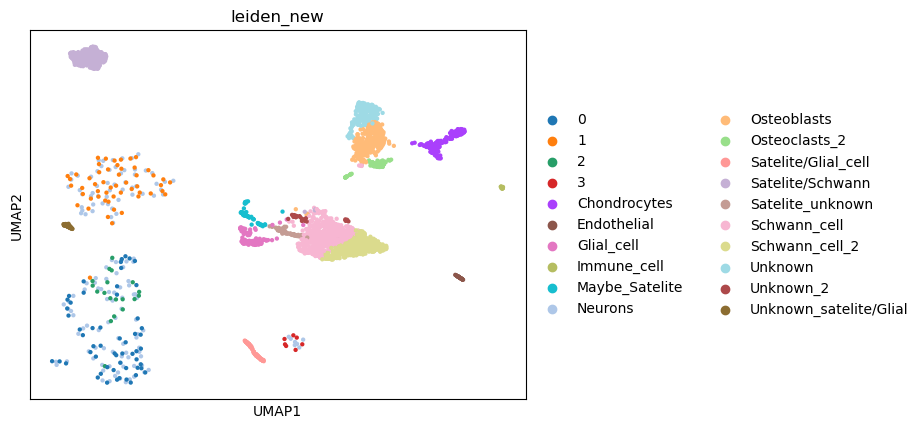

In [183]:
#comcat two datasets
##combined_new.obs_names_make_unique()

sc.pl.umap(combined_new,color='leiden_new')

In [192]:
combined_new.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Finalneuronintergret6.h5ad")

[Executed on 2023-09-11 15:13:53.577300]


In [199]:
combined_new

[Executed on 2023-09-11 15:24:51.815658]


AnnData object with n_obs × n_vars = 3092 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'leiden_new', 'leiden_old', 'leiden_0'
    uns: 'leiden_new_colors', 'leiden_old_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'umi', 'Scale', 'log1p'

In [ ]:
import scanpy as sc

[Executed on 2023-09-11 15:25:09.895776]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


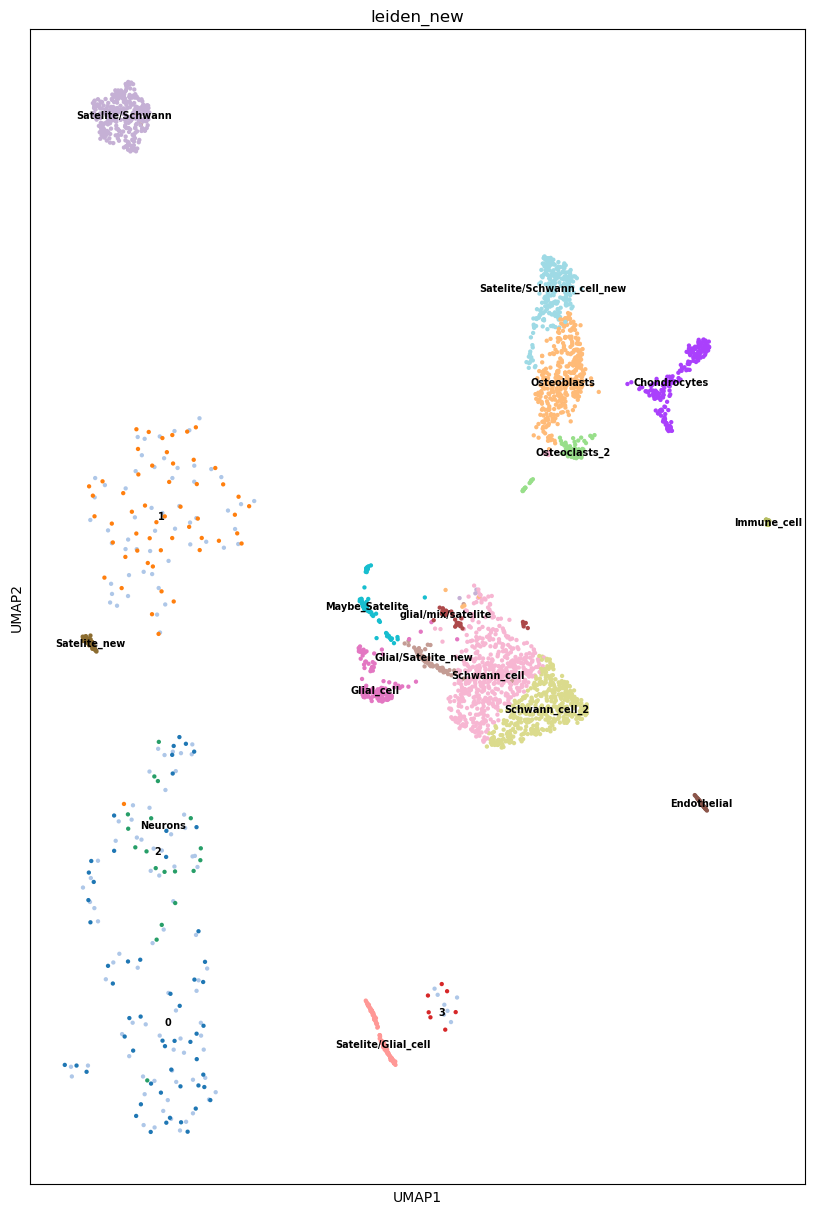

In [201]:
import os

#work directory
os.chdir('/home/juany/code/Neuron_Development/')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))
sc.pl.umap(combined_new, color='leiden_new', legend_loc='on data', legend_fontsize=7, ax=ax,save='fulllabel.pdf')


In [191]:
combined_new.obs['leiden_new'].value_counts()

[Executed on 2023-09-11 15:11:17.574090]


leiden_new
Schwann_cell                 564
Schwann_cell_2               445
Osteoblasts                  370
Satelite/Schwann             306
Satelite/Schwann_cell_new    249
Chondrocytes                 204
Neurons                      140
Glial_cell                   129
Satelite/Glial_cell          122
Glial/Satelite_new            93
Osteoclasts_2                 91
Maybe_Satelite                78
Satelite_new                  63
0                             56
1                             53
glial/mix/satelite            41
Endothelial                   40
Immune_cell                   22
2                             19
3                              7
Name: count, dtype: int64

In [186]:
combined_new.obs['leiden_new'].value_counts()

[Executed on 2023-09-11 15:06:45.419452]


leiden_new
Schwann_cell              564
Schwann_cell_2            445
Osteoblasts               370
Satelite/Schwann          306
Unknown                   249
Chondrocytes              204
Neurons                   140
Glial_cell                129
Satelite/Glial_cell       122
Satelite_unknown           93
Osteoclasts_2              91
Maybe_Satelite             78
Unknown_satelite/Glial     63
0                          56
1                          53
Unknown_2                  41
Endothelial                40
Immune_cell                22
2                          19
3                           7
Name: count, dtype: int64

In [189]:
combined_new.obs['leiden_new'] = combined_new.obs['leiden_new'].replace({
    'Unknown_satelite/Glial': 'Satelite_new',
    'Unknown': 'Satelite/Schwann_cell_new',
    'Unknown_2': 'Glial/mix/Satelite',
    'Satelite_unknown': 'Glial/Satelite_new',
})


[Executed on 2023-09-11 15:10:00.117951]


In [173]:
combined_del_neuron.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Final_final.h5ad")

[Executed on 2023-09-11 14:50:50.082549]


In [157]:
subsubsubcluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Final_neuron.h5ad")

[Executed on 2023-09-11 14:41:02.389317]


In [ ]:
subx4cluster.write_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/Final_neuron_2.h5ad")

[Executed on 2023-09-11 14:33:44.706511]
